In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Load the exam dataset
data = pd.read_csv('exam_dataset.csv')

# Checking  first few rows

print(data.head())

# Check the shape

print(f"Number of compounds: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")

# Check column names
print("\n Column names")
print(data.columns.tolist())


                                              SMILES  Ki (nM)
0        Cc1cc(C)cc(NC(=O)NCc2ccc(Cc3c[nH]cn3)cc2)c1      9.0
1  O=C(NCc1ccc(Cc2c[nH]cn2)cc1)NCc1cc(C(F)(F)F)cc...     90.0
2     O=C(CCCOCCCc1c[nH]cn1)c1ccc(F)cc1.O=C(O)C(=O)O     14.0
3         O=C(O)/C=C\C(=O)O.c1nc(COCCC2CCCCC2)c[nH]1    500.0
4      O=C(Nc1cc(Cl)cc(Cl)c1)OCc1ccc(Cc2c[nH]cn2)cc1      5.0
Number of compounds: 7562
Number of columns: 2

 Column names
['SMILES', 'Ki (nM)']


In [2]:
# Analyze Ki (nM) distribution
ki_column = 'Ki (nM)'

# Check for missing values
print(f"Missing values in {ki_column}: {data[ki_column].isna().sum()}")

# Basic statistics
print(f"Statistics for {ki_column}")
print(data[ki_column].describe())

# Check the range
print(f"\nMin Ki: {data[ki_column].min():.2f} nM")
print(f"Max Ki: {data[ki_column].max():.2f} nM")
print(f"Range spans: {data[ki_column].max() / data[ki_column].min():.0f} fold")

# Calculate skewness
raw_skewness = skew(data[ki_column].dropna())
print(f"\nSkewness of raw Ki: {raw_skewness:.2f}")

Missing values in Ki (nM): 6
Statistics for Ki (nM)
count    7.556000e+03
mean     7.656691e+14
std      2.938241e+16
min      2.000000e-02
25%      2.900000e+00
50%      1.500000e+01
75%      9.300000e+01
max      1.995262e+18
Name: Ki (nM), dtype: float64

Min Ki: 0.02 nM
Max Ki: 1995262314968882688.00 nM
Range spans: 99763115748444127232 fold

Skewness of raw Ki: 51.67


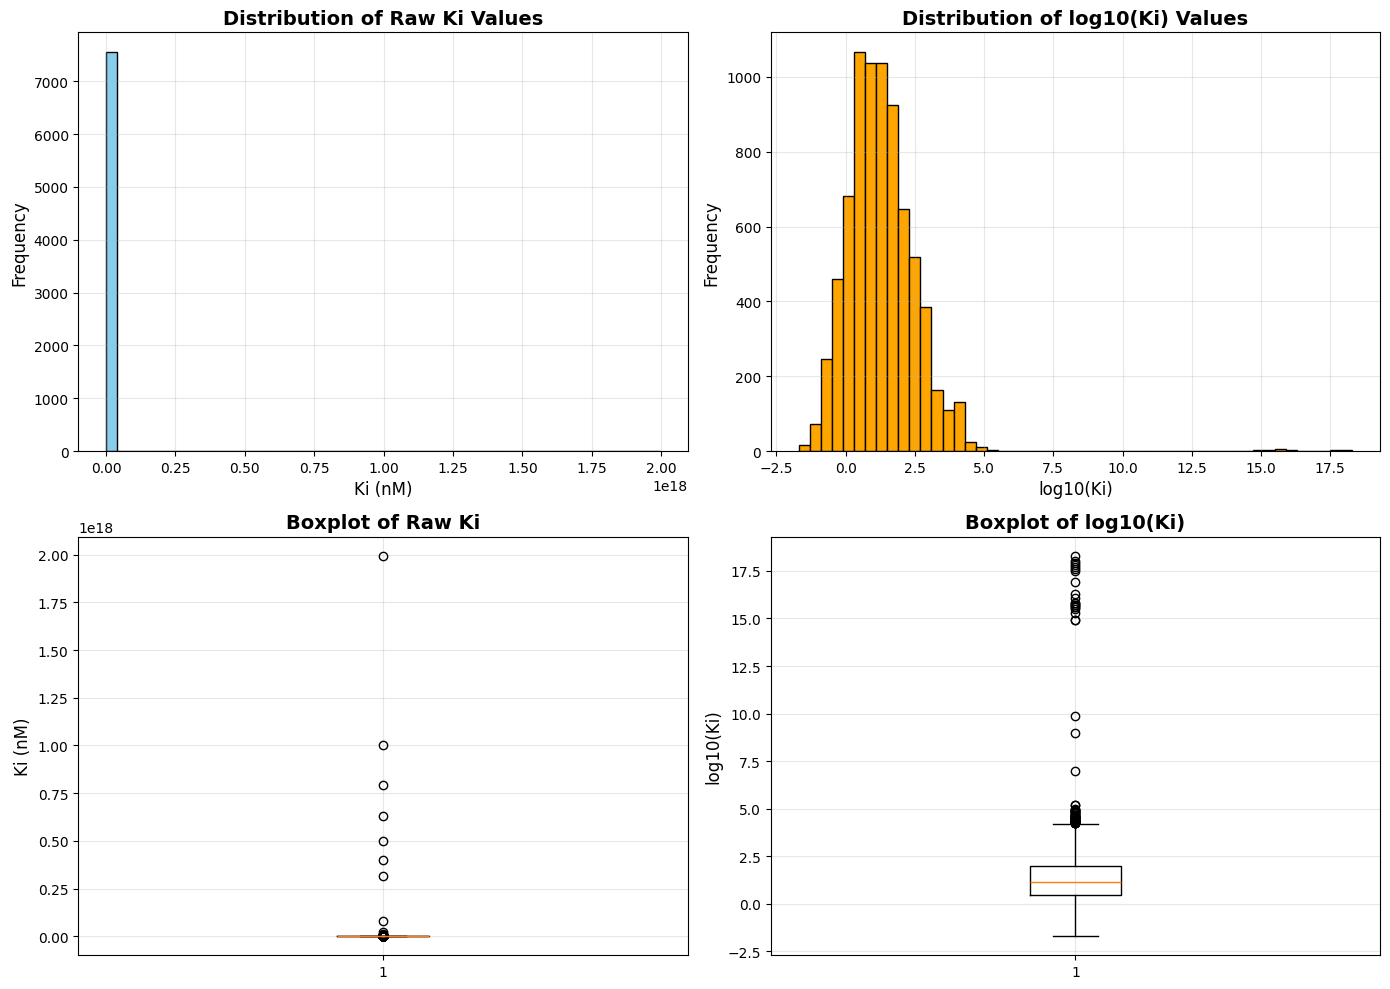


 Skewness Comparison 
Raw Ki skewness: 51.67
Log10(Ki) skewness: 3.83
Improvement: 47.84


In [3]:
# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

ki_column = 'Ki (nM)'

# Plot 1: Histogram of raw Ki
axes[0, 0].hist(data[ki_column].dropna(), bins=50, edgecolor='black', color='skyblue')
axes[0, 0].set_xlabel('Ki (nM)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].set_title('Distribution of Raw Ki Values', fontsize=14, fontweight='bold')
axes[0, 0].grid(alpha=0.3)

# Plot 2: Histogram of log10(Ki)
log_ki = np.log10(data[ki_column].dropna())
axes[0, 1].hist(log_ki, bins=50, edgecolor='black', color='orange')
axes[0, 1].set_xlabel('log10(Ki)', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)
axes[0, 1].set_title('Distribution of log10(Ki) Values', fontsize=14, fontweight='bold')
axes[0, 1].grid(alpha=0.3)

# Plot 3: Boxplot of raw Ki
axes[1, 0].boxplot(data[ki_column].dropna(), vert=True)
axes[1, 0].set_ylabel('Ki (nM)', fontsize=12)
axes[1, 0].set_title('Boxplot of Raw Ki', fontsize=14, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# Plot 4: Boxplot of log10(Ki)
axes[1, 1].boxplot(log_ki, vert=True)
axes[1, 1].set_ylabel('log10(Ki)', fontsize=12)
axes[1, 1].set_title('Boxplot of log10(Ki)', fontsize=14, fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('ki_distribution_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Calculate skewness after transformation
log_skewness = skew(log_ki)
print(f"\n Skewness Comparison ")
print(f"Raw Ki skewness: {raw_skewness:.2f}")
print(f"Log10(Ki) skewness: {log_skewness:.2f}")
print(f"Improvement: {abs(raw_skewness) - abs(log_skewness):.2f}")

In [4]:
# Apply log10 transformation
data['log10_Ki'] = np.log10(data['Ki (nM)'])

print("\n Transformation applied!")
print(f"New column 'log10_Ki' created")
print(f"\nDataset now has {len(data.columns)} columns:")
print(data.columns.tolist())

# Verify the transformation
print("\n Transformed data preview")
print(data[['SMILES', 'Ki (nM)', 'log10_Ki']].head(10))


 Transformation applied!
New column 'log10_Ki' created

Dataset now has 3 columns:
['SMILES', 'Ki (nM)', 'log10_Ki']

 Transformed data preview
                                              SMILES  Ki (nM)  log10_Ki
0        Cc1cc(C)cc(NC(=O)NCc2ccc(Cc3c[nH]cn3)cc2)c1      9.0  0.954243
1  O=C(NCc1ccc(Cc2c[nH]cn2)cc1)NCc1cc(C(F)(F)F)cc...     90.0  1.954243
2     O=C(CCCOCCCc1c[nH]cn1)c1ccc(F)cc1.O=C(O)C(=O)O     14.0  1.146128
3         O=C(O)/C=C\C(=O)O.c1nc(COCCC2CCCCC2)c[nH]1    500.0  2.698970
4      O=C(Nc1cc(Cl)cc(Cl)c1)OCc1ccc(Cc2c[nH]cn2)cc1      5.0  0.698970
5  CN(Cc1ccc(Cc2c[nH]cn2)cc1)C(=O)N(C)c1cc(Cl)cc(...    370.0  2.568202
6            O=C(NCc1ccc(Cc2c[nH]cn2)cc1)Nc1ccccc1Cl     32.0  1.505150
7          COc1cccc(NC(=O)NCc2ccc(Cc3c[nH]cn3)cc2)c1     18.0  1.255273
8                  C=CCCCOCCCc1c[nH]cn1.O=C(O)C(=O)O     27.0  1.431364
9                      CCOCCCc1c[nH]cn1.O=C(O)C(=O)O    580.0  2.763428


In [5]:
#  Remove missing Ki
data_clean = data.dropna(subset=['Ki (nM)']).copy()

#  Remove biologically implausible outliers (data-driven)
upper_cap = data_clean['Ki (nM)'].quantile(0.99)
data_clean = data_clean[data_clean['Ki (nM)'] <= upper_cap].copy()

# Log transform
data_clean['log10_Ki'] = np.log10(data_clean['Ki (nM)'])

#  Convert to pKi
data_clean['pKi'] = 9 - data_clean['log10_Ki']


In [6]:
print(" Data Cleaning Summary ")
print(f"Original dataset: {len(data)} compounds")
print(f"After removing missing Ki: {len(data.dropna(subset=['Ki (nM)']))} compounds")
print(f"99th percentile cap: {upper_cap:.2f} nM")
print(f"Final clean dataset: {len(data_clean)} compounds")
print(f"Removed: {len(data) - len(data_clean)} compounds ({(len(data) - len(data_clean))/len(data)*100:.1f}%)")

print("\n Clean Ki Statistics ")
print(data_clean['Ki (nM)'].describe())
print(f"\nMin Ki: {data_clean['Ki (nM)'].min():.4f} nM")
print(f"Max Ki: {data_clean['Ki (nM)'].max():.2f} nM")
print(f"Range spans: {data_clean['Ki (nM)'].max() / data_clean['Ki (nM)'].min():.0f} fold")

print("\n Skewness Comparison ")
print(f"Raw Ki skewness: {skew(data_clean['Ki (nM)']):.2f}")
print(f"log10(Ki) skewness: {skew(data_clean['log10_Ki']):.2f}")
print(f"pKi skewness: {skew(data_clean['pKi']):.2f}")

print("\n Sample Data Preview ")
print(data_clean[['SMILES', 'Ki (nM)', 'log10_Ki', 'pKi']].head(10))

 Data Cleaning Summary 
Original dataset: 7562 compounds
After removing missing Ki: 7556 compounds
99th percentile cap: 13803.85 nM
Final clean dataset: 7480 compounds
Removed: 82 compounds (1.1%)

 Clean Ki Statistics 
count     7480.000000
mean       360.319535
std       1404.381248
min          0.020000
25%          2.800000
50%         14.790000
75%         87.000000
max      13600.000000
Name: Ki (nM), dtype: float64

Min Ki: 0.0200 nM
Max Ki: 13600.00 nM
Range spans: 680000 fold

 Skewness Comparison 
Raw Ki skewness: 5.90
log10(Ki) skewness: 0.31
pKi skewness: -0.31

 Sample Data Preview 
                                              SMILES  Ki (nM)  log10_Ki  \
0        Cc1cc(C)cc(NC(=O)NCc2ccc(Cc3c[nH]cn3)cc2)c1      9.0  0.954243   
1  O=C(NCc1ccc(Cc2c[nH]cn2)cc1)NCc1cc(C(F)(F)F)cc...     90.0  1.954243   
2     O=C(CCCOCCCc1c[nH]cn1)c1ccc(F)cc1.O=C(O)C(=O)O     14.0  1.146128   
3         O=C(O)/C=C\C(=O)O.c1nc(COCCC2CCCCC2)c[nH]1    500.0  2.698970   
4      O=C(Nc1cc(Cl)cc

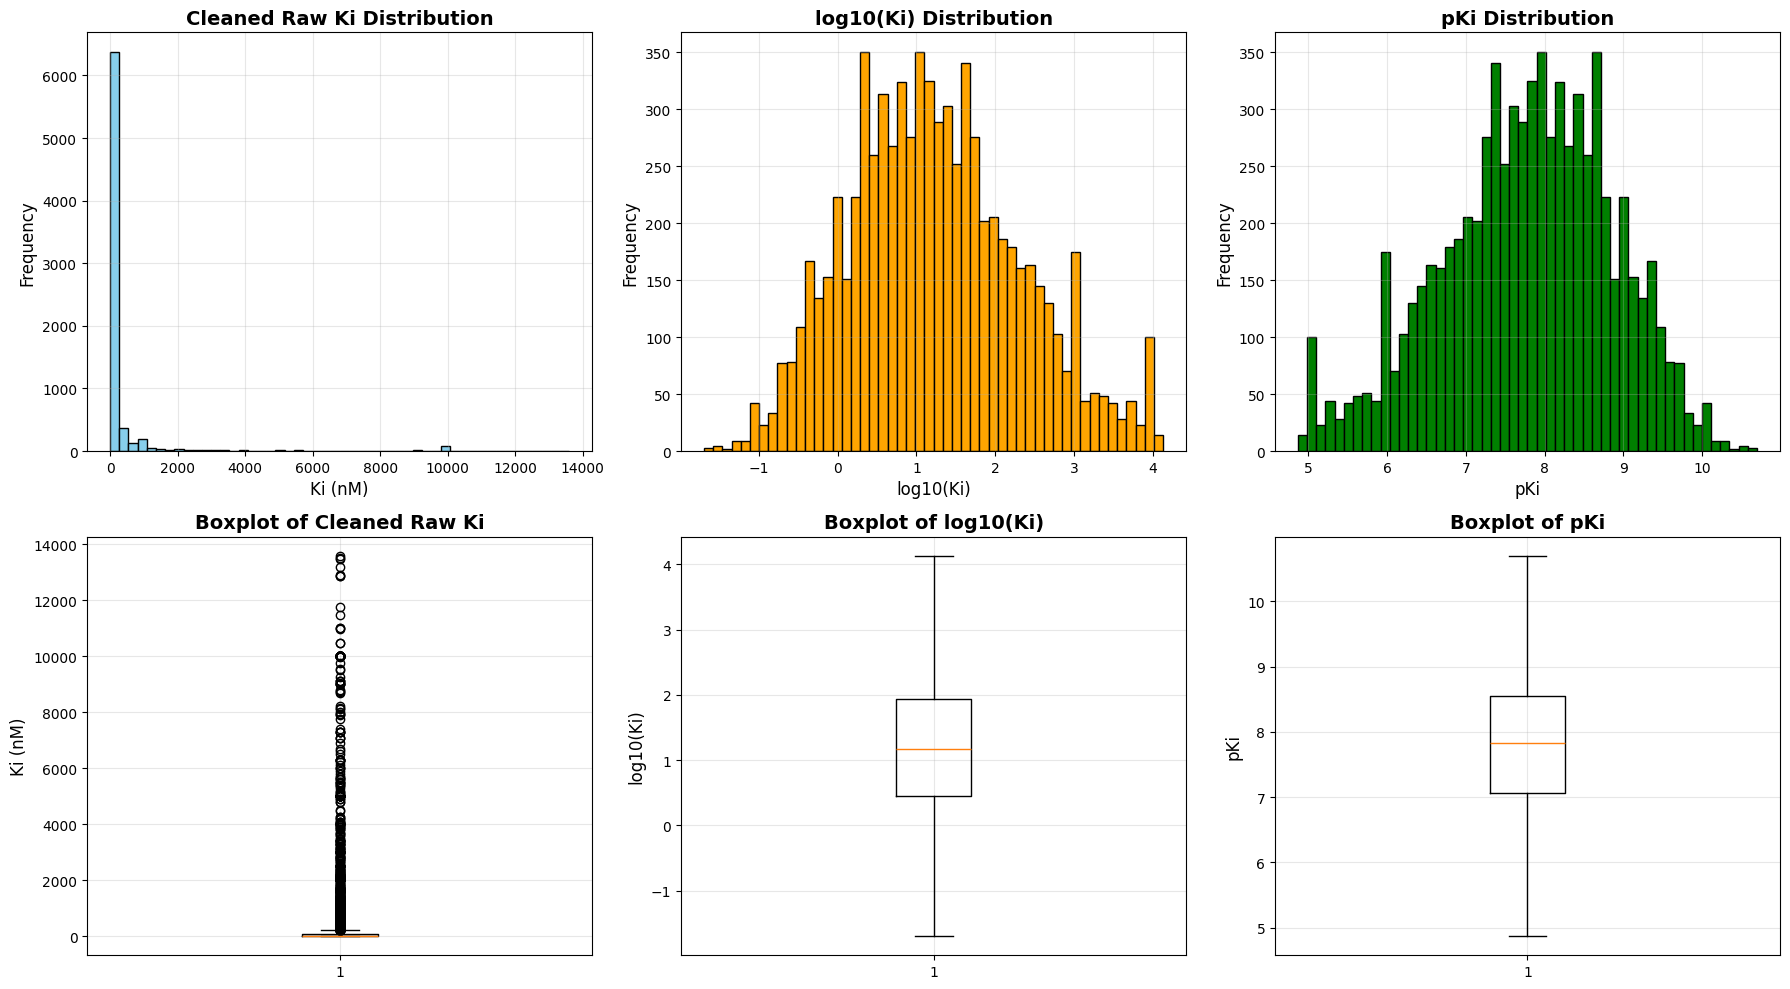

In [7]:
# Create visualization of cleaned data
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

#  Histograms
#  Histogram of cleaned raw Ki
axes[0, 0].hist(data_clean['Ki (nM)'], bins=50, edgecolor='black', color='skyblue')
axes[0, 0].set_xlabel('Ki (nM)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].set_title('Cleaned Raw Ki Distribution', fontsize=14, fontweight='bold')
axes[0, 0].grid(alpha=0.3)

#  Histogram of log10(Ki)
axes[0, 1].hist(data_clean['log10_Ki'], bins=50, edgecolor='black', color='orange')
axes[0, 1].set_xlabel('log10(Ki)', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)
axes[0, 1].set_title('log10(Ki) Distribution', fontsize=14, fontweight='bold')
axes[0, 1].grid(alpha=0.3)

#  Histogram of pKi
axes[0, 2].hist(data_clean['pKi'], bins=50, edgecolor='black', color='green')
axes[0, 2].set_xlabel('pKi', fontsize=12)
axes[0, 2].set_ylabel('Frequency', fontsize=12)
axes[0, 2].set_title('pKi Distribution', fontsize=14, fontweight='bold')
axes[0, 2].grid(alpha=0.3)

#  Boxplots
#  Boxplot of cleaned raw Ki
axes[1, 0].boxplot(data_clean['Ki (nM)'], vert=True)
axes[1, 0].set_ylabel('Ki (nM)', fontsize=12)
axes[1, 0].set_title('Boxplot of Cleaned Raw Ki', fontsize=14, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

#  Boxplot of log10(Ki)
axes[1, 1].boxplot(data_clean['log10_Ki'], vert=True)
axes[1, 1].set_ylabel('log10(Ki)', fontsize=12)
axes[1, 1].set_title('Boxplot of log10(Ki)', fontsize=14, fontweight='bold')
axes[1, 1].grid(alpha=0.3)

#  Boxplot of pKi
axes[1, 2].boxplot(data_clean['pKi'], vert=True)
axes[1, 2].set_ylabel('pKi', fontsize=12)
axes[1, 2].set_title('Boxplot of pKi', fontsize=14, fontweight='bold')
axes[1, 2].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('cleaned_ki_distribution_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [10]:
from rdkit import Chem
from rdkit.Chem import Descriptors, AllChem
import numpy as np

print("Starting Descriptor Generation ")

#  Convert SMILES to RDKit molecules
print("\n. Converting SMILES to RDKit molecules...")
data_clean['mol'] = data_clean['SMILES'].apply(Chem.MolFromSmiles)

# Check for invalid SMILES
invalid_count = data_clean['mol'].isna().sum()
print(f"   Invalid SMILES found: {invalid_count}")

if invalid_count > 0:
    print(f"   Removing {invalid_count} compounds with invalid SMILES...")
    data_clean = data_clean[data_clean['mol'].notna()].copy()
    print(f"   Dataset after removing invalid SMILES: {len(data_clean)} compounds")

#  Generate RDKit Descriptors
print("\n Generating RDKit molecular descriptors...")

descriptor_names = [
    'MolWt',              # Molecular weight
    'MolLogP',            # Lipophilicity (octanol-water partition)
    'TPSA',               # Topological polar surface area
    'NumHDonors',         # Number of H-bond donors
    'NumHAcceptors',      # Number of H-bond acceptors
    'NumRotatableBonds',  # Flexibility
    'NumAromaticRings',   # Aromaticity
    'NumAliphaticRings',  # Non-aromatic rings
    'RingCount',          # Total number of rings
    'HeavyAtomCount',     # Non-hydrogen atoms
    'NumHeteroatoms',     # Non-C/H atoms (N, O, S, etc.)
    'FractionCSP3',       # Fraction of sp3 carbons (saturation)
    'MolMR',              # Molar refractivity
    'BalabanJ',           # Topological index
    'NumValenceElectrons' # Total valence electrons
]

# Calculate each descriptor
for desc_name in descriptor_names:
    descriptor_func = getattr(Descriptors, desc_name)
    data_clean[desc_name] = data_clean['mol'].apply(descriptor_func)
    
print(f"   Generated {len(descriptor_names)} RDKit descriptors")

# Generate ECFP4 (Morgan) Fingerprints
print("\n. Generating ECFP4 (Morgan) fingerprints...")

def get_ecfp4_bitvect(mol, radius=2, nBits=2048):
    """Generate ECFP4 fingerprint as bit vector"""
    if mol is not None:
        return AllChem.GetMorganFingerprintAsBitVect(mol, radius=radius, nBits=nBits)
    else:
        return None

# Generate fingerprints
data_clean['ECFP4'] = data_clean['mol'].apply(
    lambda m: get_ecfp4_bitvect(m, radius=2, nBits=2048)
)

# Convert fingerprints to numpy array for modeling
def fp_to_array(fp):
    """Convert RDKit fingerprint to numpy array"""
    if fp is not None:
        arr = np.zeros((1,))
        AllChem.DataStructs.ConvertToNumpyArray(fp, arr)
        return arr
    else:
        return None

print("   ECFP4 fingerprints generated (2048 bits, radius=2)")

# S Summary
print("\n Descriptor Generation Complete ")
print(f"Final dataset: {len(data_clean)} compounds")
print(f"RDKit descriptors: {len(descriptor_names)} features")
print(f"ECFP4 fingerprints: 2048 bits")
print(f"Total columns: {len(data_clean.columns)}")

# Preview the data
print("\nData Preview ")
print(data_clean[['SMILES', 'Ki (nM)', 'pKi', 'MolWt', 'MolLogP', 'TPSA']].head())

# Check for any missing descriptor values
print("\n Checking for Missing Descriptor Values ")
missing_descriptors = data_clean[descriptor_names].isna().sum()
if missing_descriptors.sum() > 0:
    print("Missing values found:")
    print(missing_descriptors[missing_descriptors > 0])
else:
    print(" No missing descriptor values!")


Starting Descriptor Generation 

. Converting SMILES to RDKit molecules...
   Invalid SMILES found: 0

 Generating RDKit molecular descriptors...
   Generated 15 RDKit descriptors

. Generating ECFP4 (Morgan) fingerprints...
   ECFP4 fingerprints generated (2048 bits, radius=2)

 Descriptor Generation Complete 
Final dataset: 7480 compounds
RDKit descriptors: 15 features
ECFP4 fingerprints: 2048 bits
Total columns: 21

Data Preview 
                                              SMILES  Ki (nM)       pKi  \
0        Cc1cc(C)cc(NC(=O)NCc2ccc(Cc3c[nH]cn3)cc2)c1      9.0  8.045757   
1  O=C(NCc1ccc(Cc2c[nH]cn2)cc1)NCc1cc(C(F)(F)F)cc...     90.0  7.045757   
2     O=C(CCCOCCCc1c[nH]cn1)c1ccc(F)cc1.O=C(O)C(=O)O     14.0  7.853872   
3         O=C(O)/C=C\C(=O)O.c1nc(COCCC2CCCCC2)c[nH]1    500.0  6.301030   
4      O=C(Nc1cc(Cl)cc(Cl)c1)OCc1ccc(Cc2c[nH]cn2)cc1      5.0  8.301030   

     MolWt  MolLogP    TPSA  
0  334.423  3.93904   69.81  
1  456.390  5.03750   69.81  
2  380.372  2.31670  1

In [11]:
# sanity check 

# Check ALL columns in dataframe
print("\n All columns in  dataframe")
print(data_clean.columns.tolist())

print("\n Descriptor columns only")
print(descriptor_names)

print("\n Check if all Descriptor exist")
for desc in descriptor_names:
    if desc in data_clean.columns:
        print(f" {desc}")
    else:
        print(f" {desc} MISSING!")

# Show ALL descriptors for first 5 compounds
print("\n first 5 ")
print(data_clean[descriptor_names].head())


 All columns in  dataframe
['SMILES', 'Ki (nM)', 'log10_Ki', 'pKi', 'mol', 'MolWt', 'MolLogP', 'TPSA', 'NumHDonors', 'NumHAcceptors', 'NumRotatableBonds', 'NumAromaticRings', 'NumAliphaticRings', 'RingCount', 'HeavyAtomCount', 'NumHeteroatoms', 'FractionCSP3', 'MolMR', 'BalabanJ', 'NumValenceElectrons', 'ECFP4']

 Descriptor columns only
['MolWt', 'MolLogP', 'TPSA', 'NumHDonors', 'NumHAcceptors', 'NumRotatableBonds', 'NumAromaticRings', 'NumAliphaticRings', 'RingCount', 'HeavyAtomCount', 'NumHeteroatoms', 'FractionCSP3', 'MolMR', 'BalabanJ', 'NumValenceElectrons']

 Check if all Descriptor exist
 MolWt
 MolLogP
 TPSA
 NumHDonors
 NumHAcceptors
 NumRotatableBonds
 NumAromaticRings
 NumAliphaticRings
 RingCount
 HeavyAtomCount
 NumHeteroatoms
 FractionCSP3
 MolMR
 BalabanJ
 NumValenceElectrons

 first 5 
     MolWt  MolLogP    TPSA  NumHDonors  NumHAcceptors  NumRotatableBonds  \
0  334.423  3.93904   69.81           3              2                  5   
1  456.390  5.03750   69.81    

In [12]:
# Save to a pickle file
data_clean.to_pickle("processed_drug_data.pkl")
print("Data saved as Pickle file!")

# To load it back later:
# data_clean = pd.read_pickle("processed_drug_data.pkl")

Data saved as Pickle file!


In [14]:
#from sklearn.decomposition import PCA
#from sklearn.manifold import TSNE
#import umap
#import matplotlib.pyplot as plt
#from sklearn.preprocessing import StandardScaler

# Prepare data
#X = data_clean[descriptor_names].values
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)
#y = data_clean['pKi']

# PCA
#pca = PCA(n_components=2)
#coords_pca = pca.fit_transform(X_scaled)

# t-SNE
#tsne = TSNE(n_components=2, random_state=42)
#coords_tsne = tsne.fit_transform(X_scaled)

# UMAP
#reducer = umap.UMAP(n_components=2, random_state=42)
#coords_umap = reducer.fit_transform(X_scaled)

# Plot all three with CONTINUOUS pKi gradient 
#fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# PCA with viridis gradient 
#scatter1 = axes[0].scatter(coords_pca[:, 0], coords_pca[:, 1], 
 #                        # c=y, cmap='viridis', alpha=0.6, s=20)
#axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
#axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
#axes[0].set_title('PCA Projection')
#plt.colorbar(scatter1, ax=axes[0], label='pKi')

# t-SNE 
#scatter2 = axes[1].scatter(coords_tsne[:, 0], coords_tsne[:, 1], 
                          c=y, cmap='viridis', alpha=0.6, s=20)
#axes[1].set_xlabel('t-SNE 1')
#axes[1].set_ylabel('t-SNE 2')
#axes[1].set_title('t-SNE Projection')
#plt.colorbar(scatter2, ax=axes[1], label='pKi')

# UMAP 
#scatter3 = axes[2].scatter(coords_umap[:, 0], coords_umap[:, 1], 
                          c=y, cmap='viridis', alpha=0.6, s=20)
#axes[2].set_xlabel('UMAP 1')
#axes[2].set_ylabel('UMAP 2')
#axes[2].set_title('UMAP Projection')
#plt.colorbar(scatter3, ax=axes[2], label='pKi')

#plt.tight_layout()
#plt.savefig('/mnt/user-data/outputs/chemical_space_pca_tsne_umap.png', 
 #           dpi=300, bbox_inches='tight')
#plt.show()
#the gradient plot clearly didnt help , no use ful info from here 


IndentationError: unexpected indent (1954607867.py, line 38)

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


print("Testing multiple thresholds")


#Theshold stats
print("\n1. Analyzing Class Distribution at Different Thresholds\n")

thresholds = [10, 15, 50, 100, 500, 1000]

print(f"{'Threshold':<12} {'Active':>10} {'% Active':>10} {'Inactive':>10} {'% Inactive':>12}")
print("-" * 80)

for thresh in thresholds:
    active = (data_clean['Ki (nM)'] <= thresh)
    n_active = active.sum()
    pct_active = n_active / len(data_clean) * 100
    n_inactive = (~active).sum()
    pct_inactive = 100 - pct_active
    
    print(f"{thresh:>5} nM     {n_active:>6}     {pct_active:>6.1f}%     {n_inactive:>6}        {pct_inactive:>6.1f}%")



Testing multiple thresholds

1. Analyzing Class Distribution at Different Thresholds

Threshold        Active   % Active   Inactive   % Inactive
--------------------------------------------------------------------------------
   10 nM       3339       44.6%       4141          55.4%
   15 nM       3801       50.8%       3679          49.2%
   50 nM       5134       68.6%       2346          31.4%
  100 nM       5743       76.8%       1737          23.2%
  500 nM       6694       89.5%        786          10.5%
 1000 nM       7041       94.1%        439           5.9%


Analysing Descriptor coorelations

Correlation Matrix Shape: (15, 15)

Highly Correlated Pairs (|r| > 0.8):
------------------------------------------------------------
MolWt                <-> HeavyAtomCount       :  0.969
MolWt                <-> MolMR                :  0.953
MolWt                <-> NumValenceElectrons  :  0.971
TPSA                 <-> NumHeteroatoms       :  0.814
HeavyAtomCount       <-> MolMR                :  0.975
HeavyAtomCount       <-> NumValenceElectrons  :  0.992
MolMR                <-> NumValenceElectrons  :  0.964


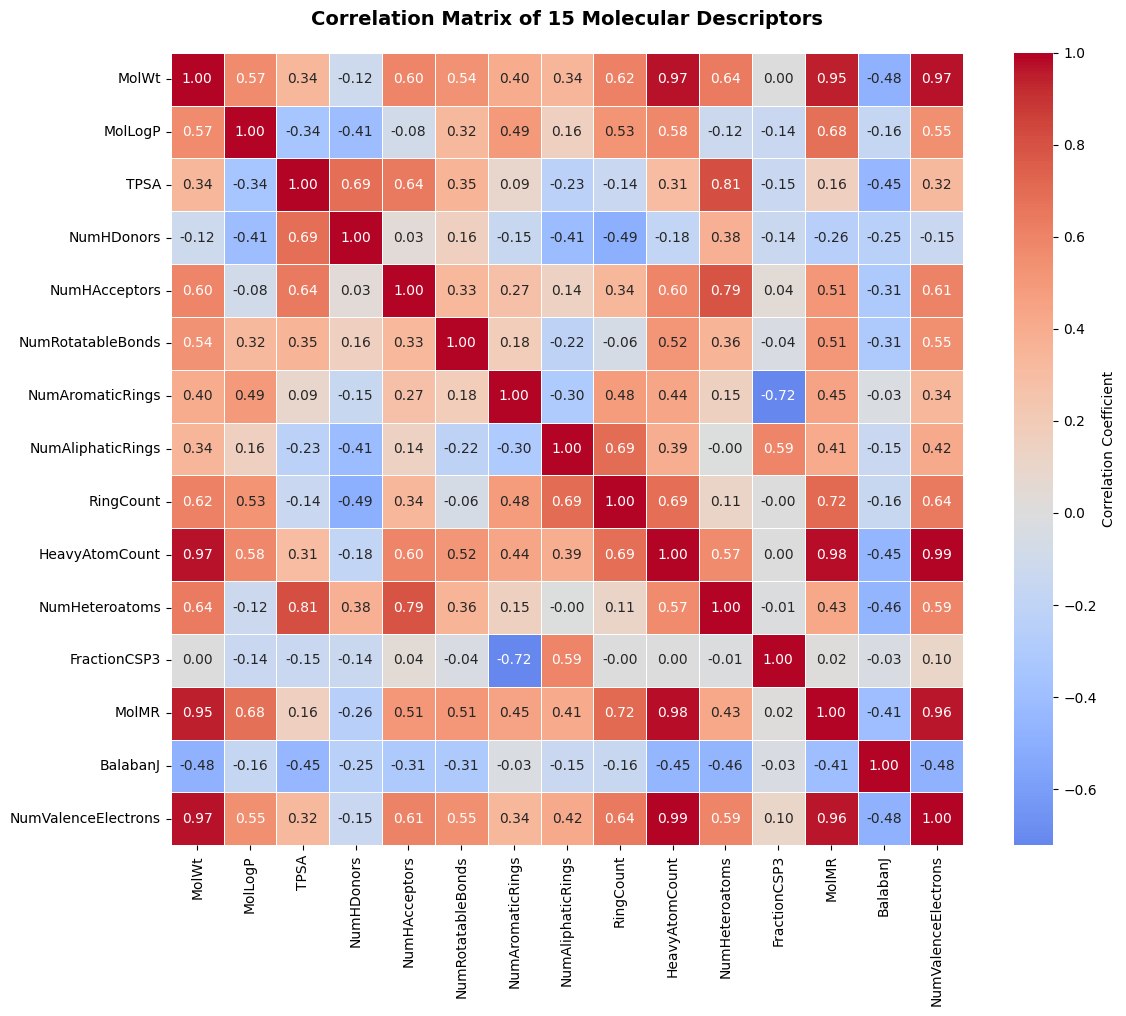


 Correlation matrix displayed!


<Figure size 640x480 with 0 Axes>

In [16]:

# CORRELATION MATRIX - UNDERSTANDING DESCRIPTOR RELATIONSHIPS


import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


print("Analysing Descriptor coorelations")


# Calculate correlation matrix
corr_matrix = data_clean[descriptor_names].corr()

print("\nCorrelation Matrix Shape:", corr_matrix.shape)
print("\nHighly Correlated Pairs (|r| > 0.8):")
print("-" * 60)

# Find highly correlated pairs
for i in range(len(descriptor_names)):
    for j in range(i+1, len(descriptor_names)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.8:
            print(f"{descriptor_names[i]:<20} <-> {descriptor_names[j]:<20} : {corr_val:>6.3f}")

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=0.5, 
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of 15 Molecular Descriptors', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show() 

print("\n Correlation matrix displayed!")
plt.savefig('descriptor_correlation_matrix.png', dpi=300, bbox_inches='tight')


Analysing Descriptor coorelations

Correlation Matrix Shape: (15, 15)

Highly Correlated Pairs (|r| > 0.8):
MolWt                <-> HeavyAtomCount       :  0.969
MolWt                <-> MolMR                :  0.953
MolWt                <-> NumValenceElectrons  :  0.971
TPSA                 <-> NumHeteroatoms       :  0.814
HeavyAtomCount       <-> MolMR                :  0.975
HeavyAtomCount       <-> NumValenceElectrons  :  0.992
MolMR                <-> NumValenceElectrons  :  0.964


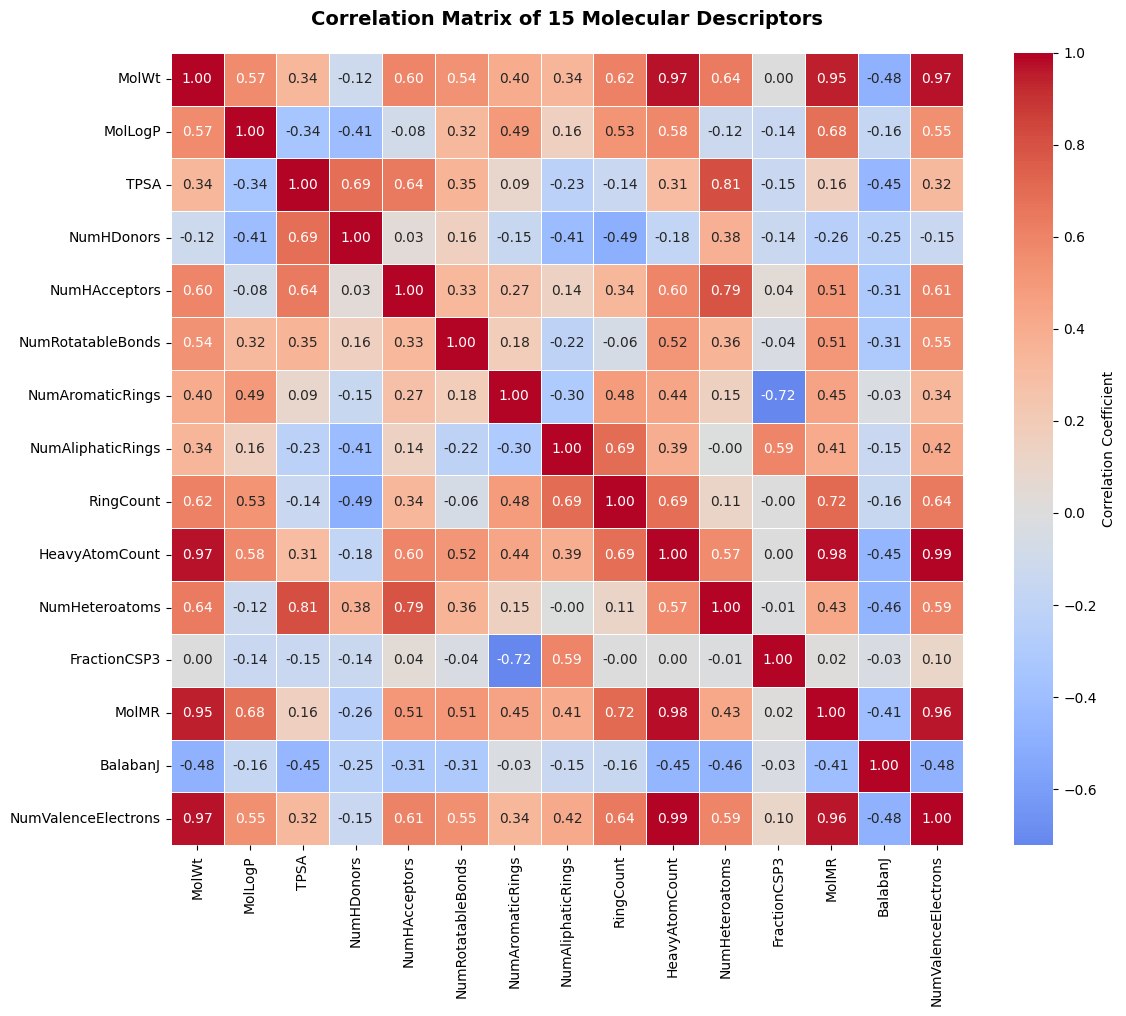


 Correlation matrix saved!


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


print("Analysing Descriptor coorelations")


# Calculate correlation matrix
corr_matrix = data_clean[descriptor_names].corr()

print("\nCorrelation Matrix Shape:", corr_matrix.shape)
print("\nHighly Correlated Pairs (|r| > 0.8):")


# Find highly correlated pairs
for i in range(len(descriptor_names)):
    for j in range(i+1, len(descriptor_names)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.8:
            print(f"{descriptor_names[i]:<20} <-> {descriptor_names[j]:<20} : {corr_val:>6.3f}")

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=0.5, 
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of 15 Molecular Descriptors', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('descriptor_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Correlation matrix saved!")


PCA scree plot to explain variance

Total descriptors: 15
Total components: 15

Variance Explained by Each Component:
PC 1:  43.2%  (Cumulative:  43.2%)
PC 2:  21.4%  (Cumulative:  64.6%)
PC 3:  14.6%  (Cumulative:  79.1%)
PC 4:   7.9%  (Cumulative:  87.0%)
PC 5:   5.3%  (Cumulative:  92.3%)
PC 6:   2.9%  (Cumulative:  95.2%)
PC 7:   1.7%  (Cumulative:  96.9%)
PC 8:   1.3%  (Cumulative:  98.2%)
PC 9:   0.6%  (Cumulative:  98.8%)
PC10:   0.6%  (Cumulative:  99.4%)
PC11:   0.4%  (Cumulative:  99.8%)
PC12:   0.2%  (Cumulative: 100.0%)
PC13:   0.0%  (Cumulative: 100.0%)
PC14:   0.0%  (Cumulative: 100.0%)
PC15:   0.0%  (Cumulative: 100.0%)

Key Milestones:
  First 2 PCs: 64.6%
  First 3 PCs: 79.1%
  First 5 PCs: 92.3%


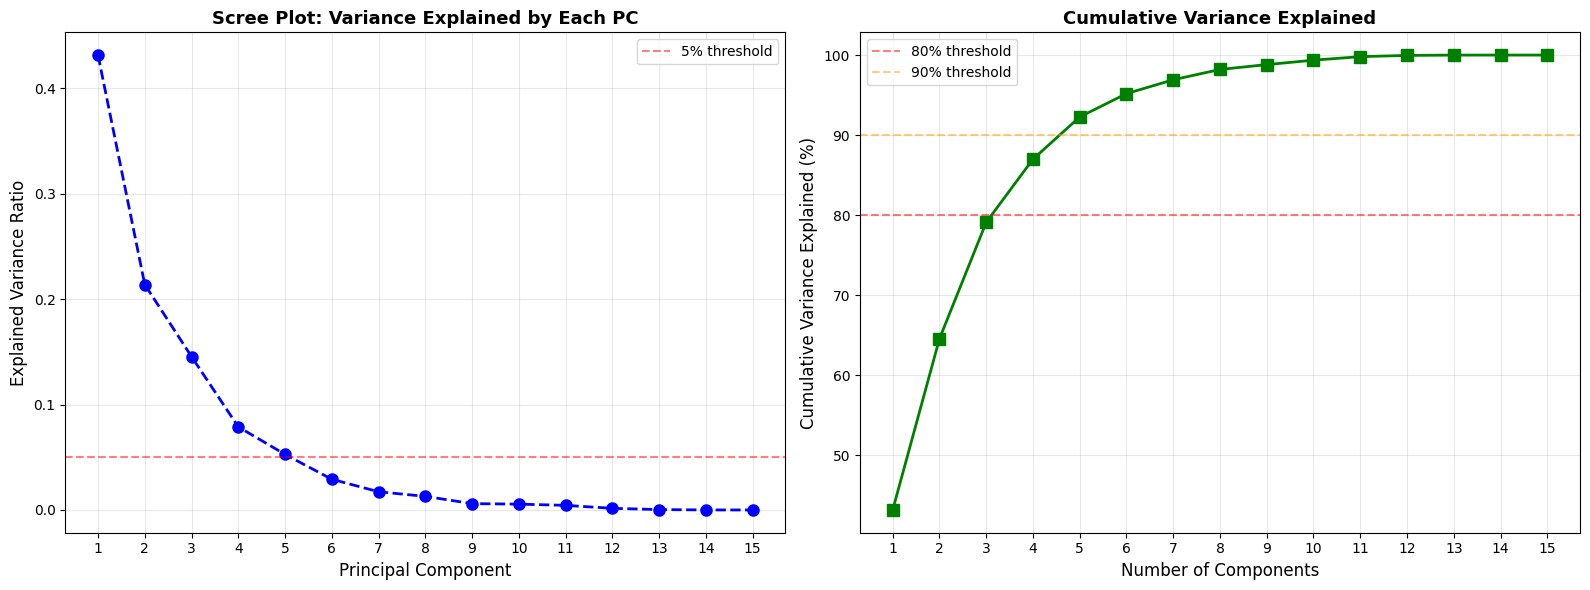


 Scree plot saved!


In [18]:
#scree plot  to explain variance 

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np


print("PCA scree plot to explain variance")


# Prepare data
X = data_clean[descriptor_names].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run PCA with ALL components
pca_full = PCA()
pca_full.fit(X_scaled)

# Get explained variance
explained_var = pca_full.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

# Print summary
print(f"\nTotal descriptors: {len(descriptor_names)}")
print(f"Total components: {len(explained_var)}")
print("\nVariance Explained by Each Component:")

for i in range(len(explained_var)):
    print(f"PC{i+1:>2}: {explained_var[i]:>6.1%}  (Cumulative: {cumulative_var[i]:>6.1%})")

print("\nKey Milestones:")
print(f"  First 2 PCs: {cumulative_var[1]:.1%}")
print(f"  First 3 PCs: {cumulative_var[2]:.1%}")
print(f"  First 5 PCs: {cumulative_var[4]:.1%}")

# Create scree plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Variance per component (scree plot)
ax1.plot(range(1, len(explained_var) + 1), explained_var, 
         marker='o', linestyle='--', color='b', linewidth=2, markersize=8)
ax1.set_xlabel('Principal Component', fontsize=12)
ax1.set_ylabel('Explained Variance Ratio', fontsize=12)
ax1.set_title('Scree Plot: Variance Explained by Each PC', fontsize=13, fontweight='bold')
ax1.grid(alpha=0.3)
ax1.axhline(y=0.05, color='r', linestyle='--', alpha=0.5, label='5% threshold')
ax1.legend()
ax1.set_xticks(range(1, len(explained_var) + 1))

# Plot 2: Cumulative variance
ax2.plot(range(1, len(explained_var) + 1), cumulative_var * 100, 
         marker='s', linestyle='-', color='green', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Components', fontsize=12)
ax2.set_ylabel('Cumulative Variance Explained (%)', fontsize=12)
ax2.set_title('Cumulative Variance Explained', fontsize=13, fontweight='bold')
ax2.grid(alpha=0.3)
ax2.axhline(y=80, color='r', linestyle='--', alpha=0.5, label='80% threshold')
ax2.axhline(y=90, color='orange', linestyle='--', alpha=0.5, label='90% threshold')
ax2.legend()
ax2.set_xticks(range(1, len(explained_var) + 1))

plt.tight_layout()
plt.savefig('pca_scree_plot.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Scree plot saved!")


Plain PCA scatter  plot - structural diversity

Total compounds: 7480
PC1 variance: 43.2%
PC2 variance: 21.4%
Total variance explained: 64.6%


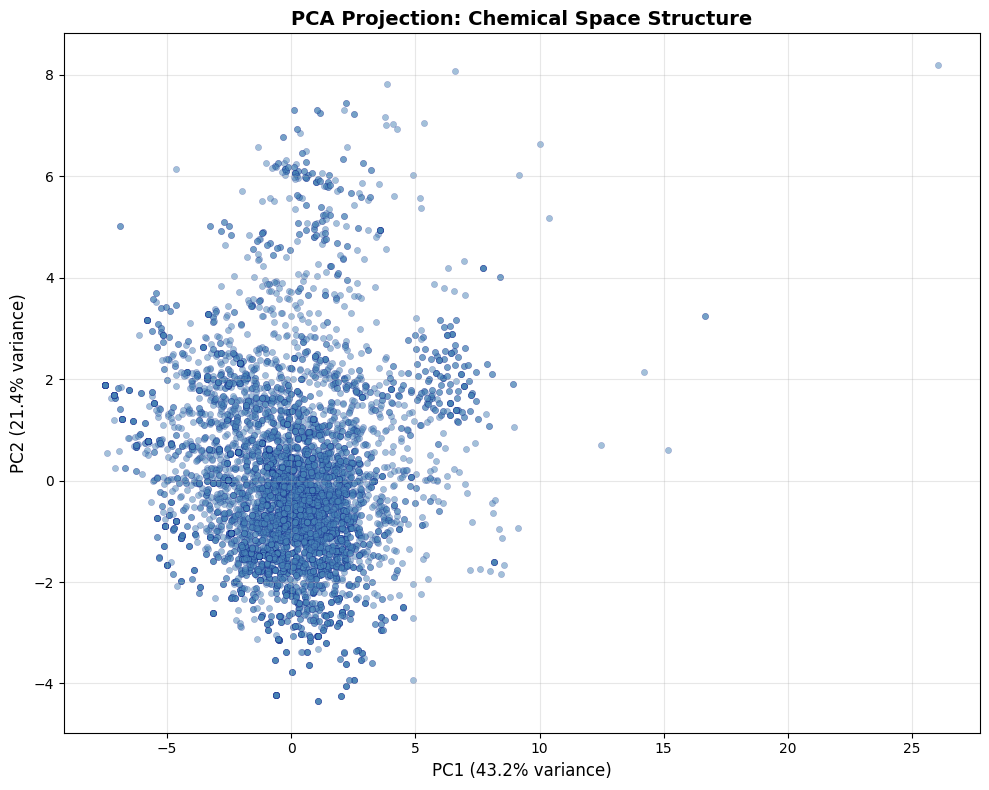


 Plain PCA scatter saved!


In [19]:
#Plain PCA scatter  plot

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


print("Plain PCA scatter  plot - structural diversity")


# Prepare data
X = data_clean[descriptor_names].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run PCA (2 components)
pca = PCA(n_components=2)
coords_pca = pca.fit_transform(X_scaled)

print(f"\nTotal compounds: {len(data_clean)}")
print(f"PC1 variance: {pca.explained_variance_ratio_[0]:.1%}")
print(f"PC2 variance: {pca.explained_variance_ratio_[1]:.1%}")
print(f"Total variance explained: {pca.explained_variance_ratio_[:2].sum():.1%}")

# Create plain scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(coords_pca[:, 0], coords_pca[:, 1], 
           c='steelblue', alpha=0.5, s=20, edgecolors='navy', linewidth=0.2)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)', fontsize=12)
plt.title('PCA Projection: Chemical Space Structure', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('pca_plain_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Plain PCA scatter saved!")


Pca: active vs inactive 


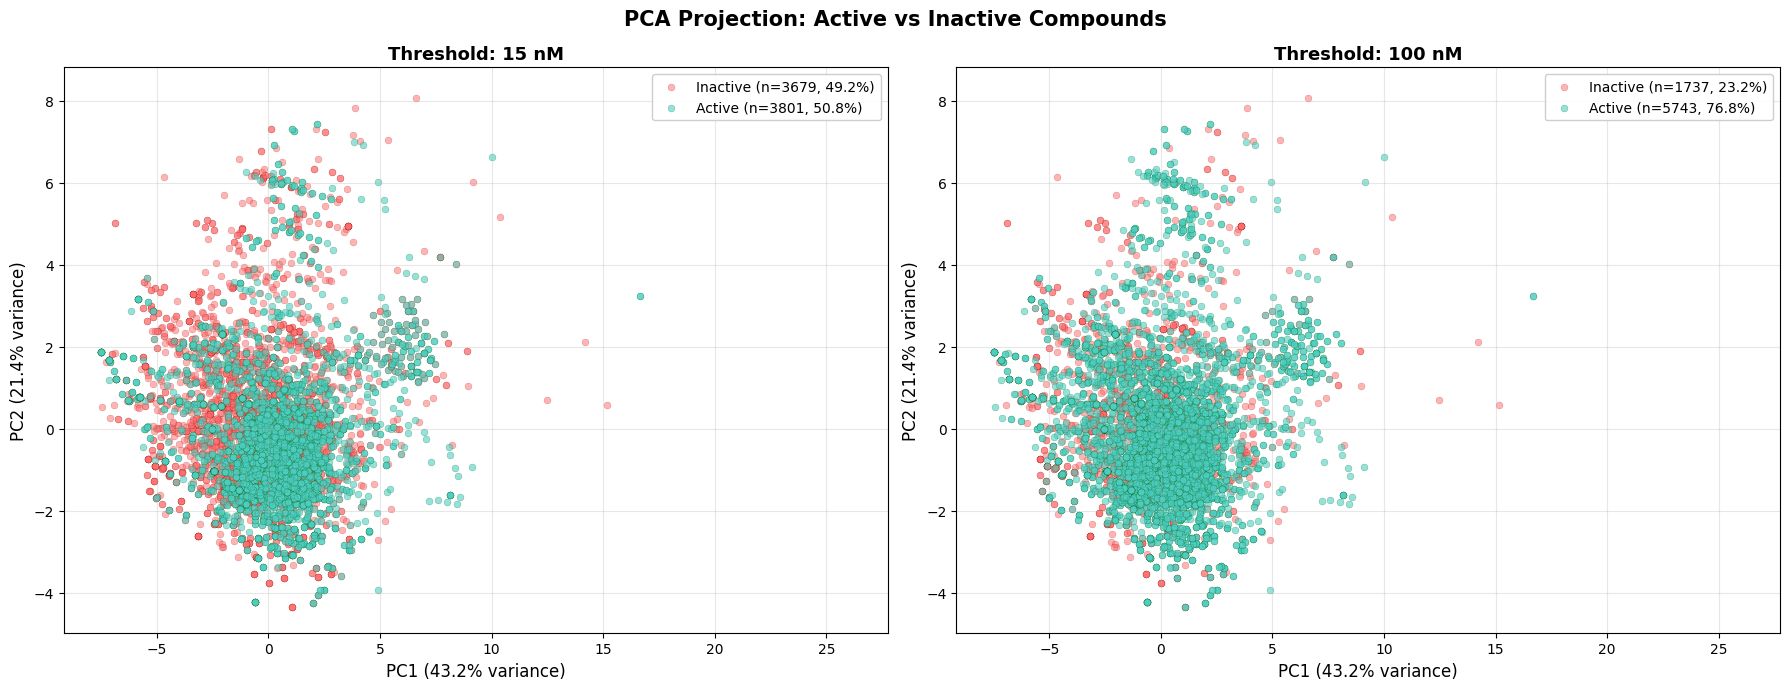


 Colored PCA plots saved!


In [20]:

#Pca scatter plot with theshold 
import matplotlib.pyplot as plt
import numpy as np


print("Pca: active vs inactive ")


# We already have coords_pca from before
# Define both thresholds
thresholds = [15, 100]

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

for idx, thresh in enumerate(thresholds):
    # Define active/inactive
    active = (data_clean['Ki (nM)'] <= thresh)
    n_active = active.sum()
    n_inactive = (~active).sum()
    pct_active = n_active / len(data_clean) * 100
    
    # Plot inactive first (background)
    axes[idx].scatter(coords_pca[~active, 0], coords_pca[~active, 1], 
                     c='#FF6B6B', alpha=0.5, s=25, 
                     label=f'Inactive (n={n_inactive}, {100-pct_active:.1f}%)', 
                     edgecolors='darkred', linewidth=0.2)
    
    # Plot active on top (foreground)
    axes[idx].scatter(coords_pca[active, 0], coords_pca[active, 1], 
                     c='#4ECDC4', alpha=0.6, s=25, 
                     label=f'Active (n={n_active}, {pct_active:.1f}%)', 
                     edgecolors='darkgreen', linewidth=0.2)
    
    # Labels
    axes[idx].set_xlabel('PC1 (43.2% variance)', fontsize=12)
    axes[idx].set_ylabel('PC2 (21.4% variance)', fontsize=12)
    axes[idx].set_title(f'Threshold: {thresh} nM', 
                       fontsize=13, fontweight='bold')
    axes[idx].legend(loc='upper right', framealpha=0.95, fontsize=10)
    axes[idx].grid(alpha=0.3)

plt.suptitle('PCA Projection: Active vs Inactive Compounds', 
             fontsize=15, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig('pca_colored_both_thresholds.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Colored PCA plots saved!")




Variable loading- WHat do they refer to  ? 

Variable Loadings:
                          PC1       PC2
HeavyAtomCount       0.986246 -0.076216
NumValenceElectrons  0.978672 -0.046442
MolWt                0.975382 -0.007993
MolMR                0.957792 -0.205624
RingCount            0.678448 -0.555230
NumHAcceptors        0.675332  0.390203
NumHeteroatoms       0.633777  0.644490
MolLogP              0.548913 -0.543541
NumRotatableBonds    0.534640  0.313215
BalabanJ            -0.518753 -0.316901
NumAromaticRings     0.462986 -0.067598
TPSA                 0.376866  0.872821
NumAliphaticRings    0.357331 -0.549059
NumHDonors          -0.131480  0.825128
FractionCSP3        -0.018160 -0.199655

Top 5 Contributors to PC1:
  HeavyAtomCount            :   0.986
  NumValenceElectrons       :   0.979
  MolWt                     :   0.975
  MolMR                     :   0.958
  RingCount                 :   0.678

Top 5 Contributors to PC2:
  TPSA                      :   0.873
  NumHDonors

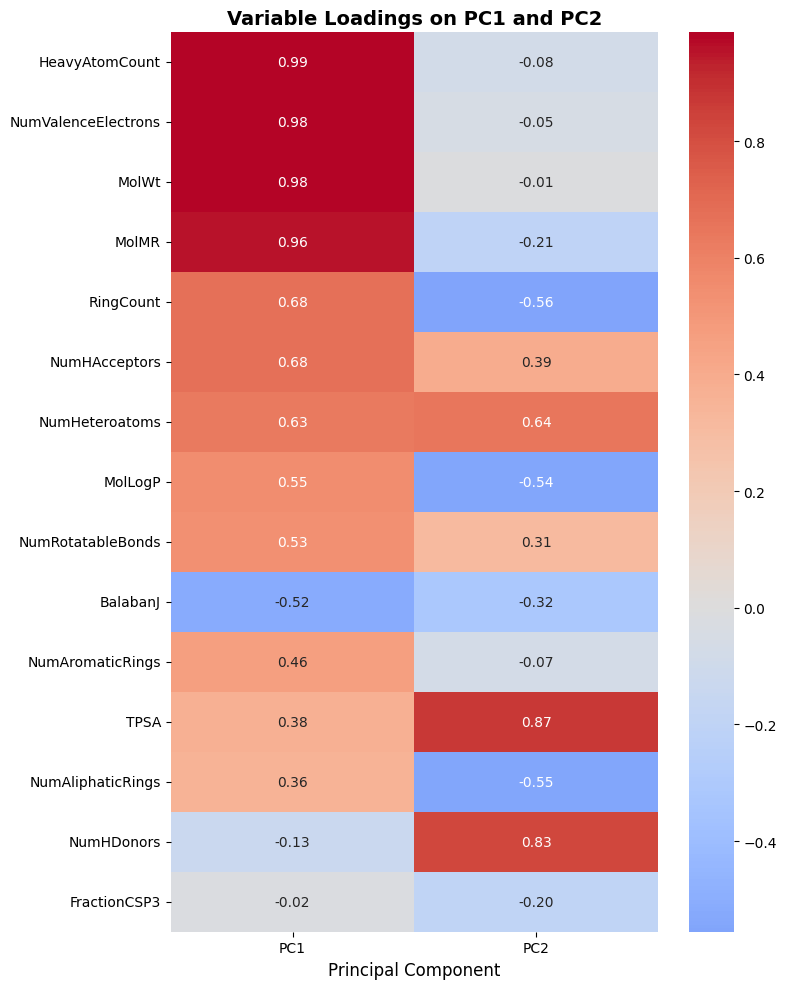


 Done!


In [21]:
#Variable loading- what does PC1 abd PC2 mean ? 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


print("Variable loading- WHat do they refer to  ? ")


# Calculate loadings (we already have pca from before)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create dataframe
loadings_df = pd.DataFrame(
    loadings[:, :2],
    columns=['PC1', 'PC2'],
    index=descriptor_names
)

# Sort by PC1 (absolute value)
loadings_df['PC1_abs'] = np.abs(loadings_df['PC1'])
loadings_df_sorted = loadings_df.sort_values('PC1_abs', ascending=False)

print("\nVariable Loadings:")

print(loadings_df_sorted[['PC1', 'PC2']].to_string())


print("\nTop 5 Contributors to PC1:")
for i in range(5):
    desc = loadings_df_sorted.index[i]
    val = loadings_df_sorted.iloc[i]['PC1']
    print(f"  {desc:<25} : {val:>7.3f}")

print("\nTop 5 Contributors to PC2:")
loadings_df_pc2 = loadings_df.copy()
loadings_df_pc2['PC2_abs'] = np.abs(loadings_df_pc2['PC2'])
loadings_df_pc2_sorted = loadings_df_pc2.sort_values('PC2_abs', ascending=False)
for i in range(5):
    desc = loadings_df_pc2_sorted.index[i]
    val = loadings_df_pc2_sorted.iloc[i]['PC2']
    print(f"  {desc:<25} : {val:>7.3f}")

# Heatmap
plt.figure(figsize=(8, 10))
sns.heatmap(loadings_df_sorted[['PC1', 'PC2']], 
            annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Variable Loadings on PC1 and PC2', fontsize=14, fontweight='bold')
plt.xlabel('Principal Component', fontsize=12)
plt.tight_layout()
plt.savefig('pca_variable_loadings.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Done!")


2026-01-07 12:47:59.895196: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-07 12:47:59.923188: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


t-SNE and UMAP- Non Linear dimensionality reduction

 Running t-SNE ...
t-SNE complete

 Running UMAP ...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


UMAP complete


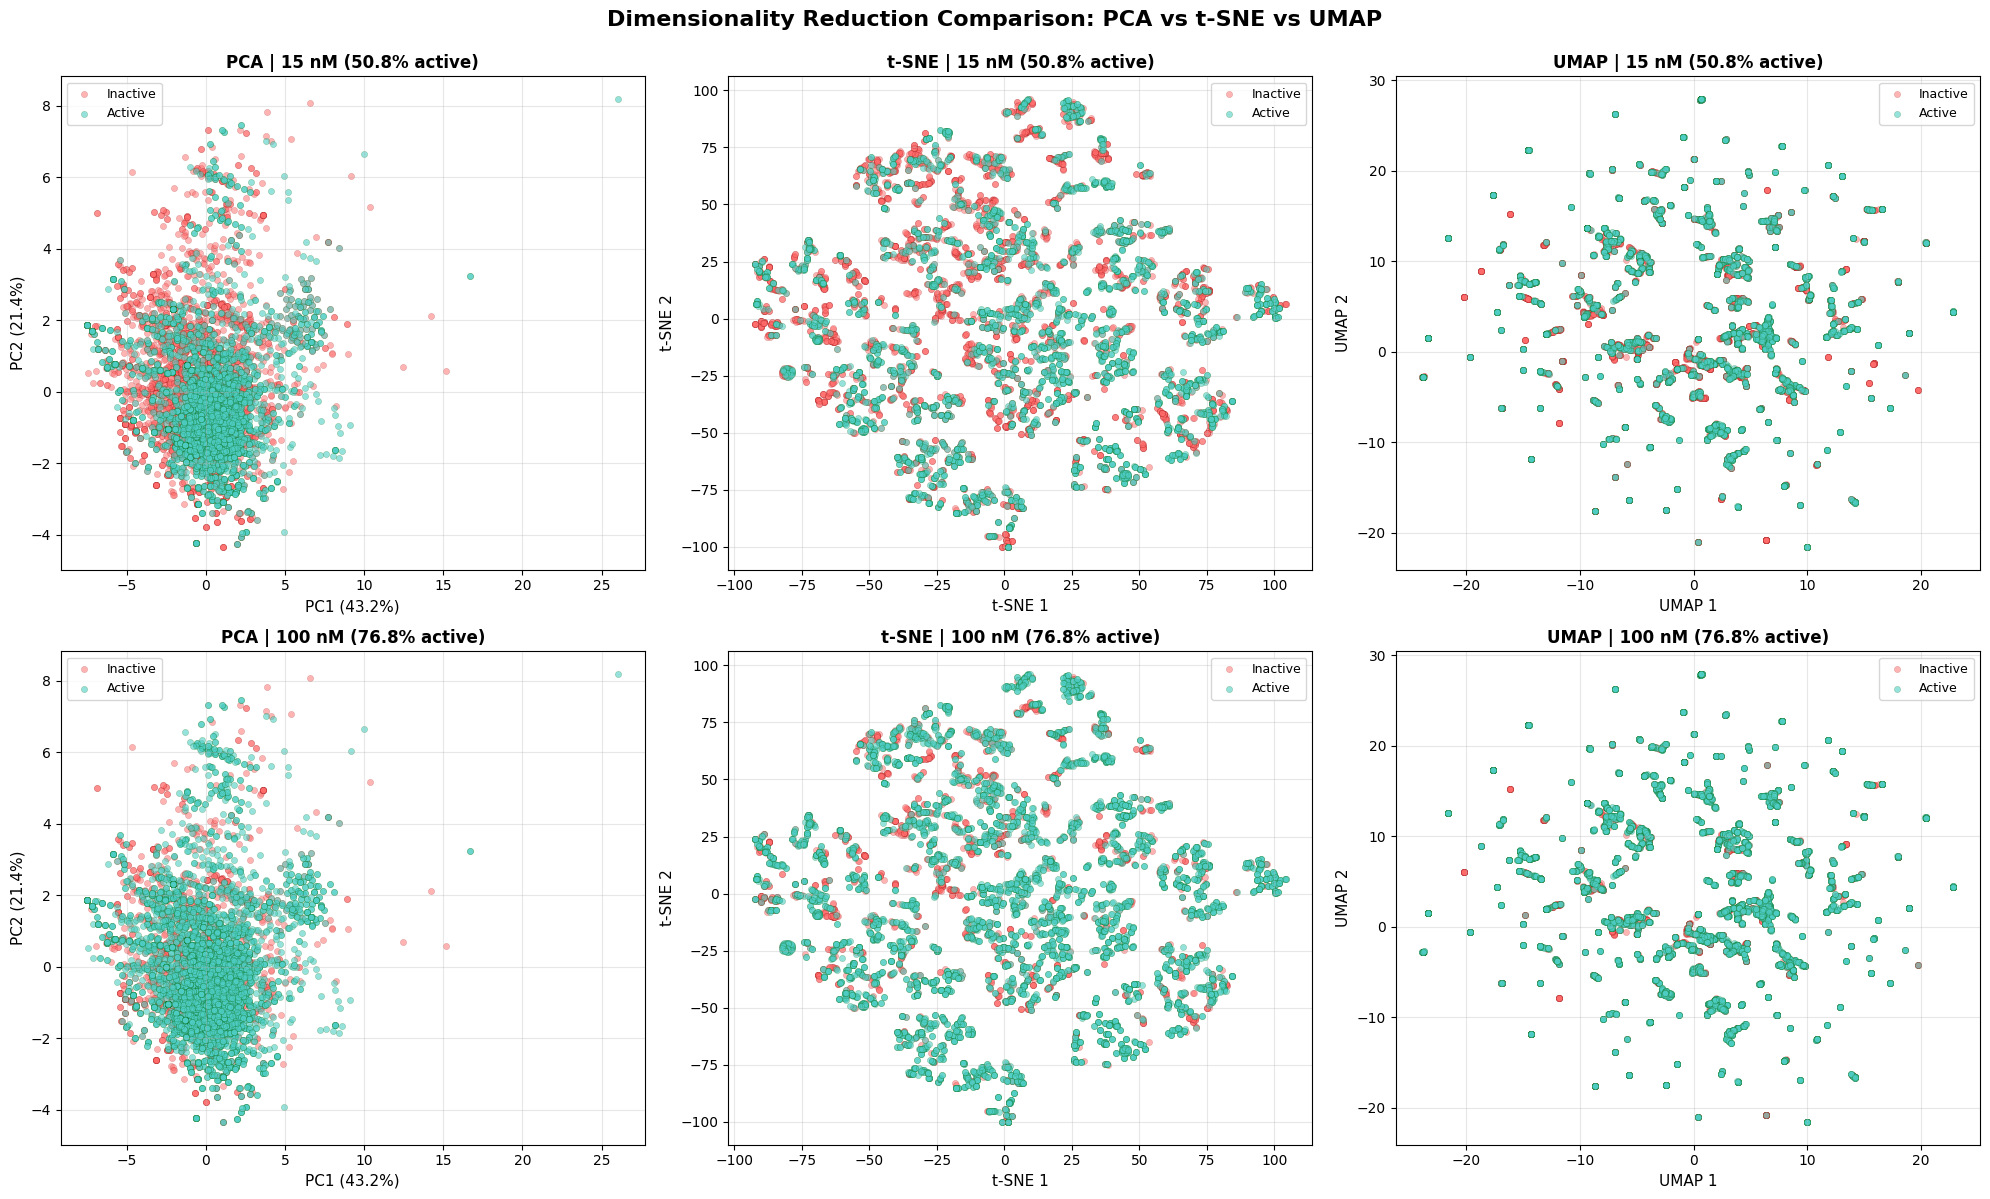


 Comparison plot saved!


In [22]:
# # t-SNE and UMAP- Non Linear dimensionality reduction 

from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
import numpy as np


print("t-SNE and UMAP- Non Linear dimensionality reduction")

# We already have X_scaled from PCA
# Define thresholds
thresholds = [15, 100]

print("\n Running t-SNE ...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30)  # Fixed: removed n_iter
coords_tsne = tsne.fit_transform(X_scaled)
print("t-SNE complete")

print("\n Running UMAP ...")
reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=15, min_dist=0.1)
coords_umap = reducer.fit_transform(X_scaled)
print("UMAP complete")

# Create comprehensive comparison plot
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

for row, thresh in enumerate(thresholds):
    # Define active/inactive
    active = (data_clean['Ki (nM)'] <= thresh)
    n_active = active.sum()
    n_inactive = (~active).sum()
    pct_active = n_active / len(data_clean) * 100
    
    # PCA (column 0)
    axes[row, 0].scatter(coords_pca[~active, 0], coords_pca[~active, 1], 
                        c='#FF6B6B', alpha=0.5, s=20, label='Inactive', 
                        edgecolors='darkred', linewidth=0.2)
    axes[row, 0].scatter(coords_pca[active, 0], coords_pca[active, 1], 
                        c='#4ECDC4', alpha=0.6, s=20, label='Active', 
                        edgecolors='darkgreen', linewidth=0.2)
    axes[row, 0].set_xlabel('PC1 (43.2%)', fontsize=11)
    axes[row, 0].set_ylabel('PC2 (21.4%)', fontsize=11)
    axes[row, 0].set_title(f'PCA | {thresh} nM ({pct_active:.1f}% active)', 
                          fontsize=12, fontweight='bold')
    axes[row, 0].legend(loc='best', fontsize=9)
    axes[row, 0].grid(alpha=0.3)
    
    # t-SNE (column 1)
    axes[row, 1].scatter(coords_tsne[~active, 0], coords_tsne[~active, 1], 
                        c='#FF6B6B', alpha=0.5, s=20, label='Inactive', 
                        edgecolors='darkred', linewidth=0.2)
    axes[row, 1].scatter(coords_tsne[active, 0], coords_tsne[active, 1], 
                        c='#4ECDC4', alpha=0.6, s=20, label='Active', 
                        edgecolors='darkgreen', linewidth=0.2)
    axes[row, 1].set_xlabel('t-SNE 1', fontsize=11)
    axes[row, 1].set_ylabel('t-SNE 2', fontsize=11)
    axes[row, 1].set_title(f't-SNE | {thresh} nM ({pct_active:.1f}% active)', 
                          fontsize=12, fontweight='bold')
    axes[row, 1].legend(loc='best', fontsize=9)
    axes[row, 1].grid(alpha=0.3)
    
    # UMAP (column 2)
    axes[row, 2].scatter(coords_umap[~active, 0], coords_umap[~active, 1], 
                        c='#FF6B6B', alpha=0.5, s=20, label='Inactive', 
                        edgecolors='darkred', linewidth=0.2)
    axes[row, 2].scatter(coords_umap[active, 0], coords_umap[active, 1], 
                        c='#4ECDC4', alpha=0.6, s=20, label='Active', 
                        edgecolors='darkgreen', linewidth=0.2)
    axes[row, 2].set_xlabel('UMAP 1', fontsize=11)
    axes[row, 2].set_ylabel('UMAP 2', fontsize=11)
    axes[row, 2].set_title(f'UMAP | {thresh} nM ({pct_active:.1f}% active)', 
                          fontsize=12, fontweight='bold')
    axes[row, 2].legend(loc='best', fontsize=9)
    axes[row, 2].grid(alpha=0.3)

plt.suptitle('Dimensionality Reduction Comparison: PCA vs t-SNE vs UMAP', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('comparison_pca_tsne_umap.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Comparison plot saved!")


In [23]:
# =========================================================
# STEP 4A: REGRESSION MODELING - RANDOM FOREST
# =========================================================

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

print("=" * 80)
print("STEP 4A: REGRESSION MODELING - RANDOM FOREST")
print("=" * 80)

# ===== PREPARE TARGET VARIABLE =====
y = data_clean['pKi'].values
print(f"\nTarget variable: pKi")
print(f"  Total samples: {len(y)}")
print(f"  Range: {y.min():.2f} to {y.max():.2f}")
print(f"  Mean: {y.mean():.2f} ± {y.std():.2f}")

# ===== PREPARE DESCRIPTOR SETS =====

# 1. RDKit descriptors (15 features)
X_rdkit = data_clean[descriptor_names].values
print(f"\n1. RDKit descriptors: {X_rdkit.shape}")

# 2. ECFP4 fingerprints (2048 features)
X_ecfp4 = np.array(data_clean['ECFP4'].tolist())
print(f"2. ECFP4 fingerprints: {X_ecfp4.shape}")

# 3. Combined (15 + 2048 = 2063 features)
X_combined = np.hstack([X_rdkit, X_ecfp4])
print(f"3. Combined descriptors: {X_combined.shape}")

# ===== SETUP CROSS-VALIDATION =====
kf = KFold(n_splits=10, shuffle=True, random_state=42)
print("\nUsing 10-fold cross-validation")

# ===== MODEL 1: RANDOM FOREST + RDKIT =====
print("\n" + "-" * 80)
print("MODEL 1: Random Forest + RDKit Descriptors")
print("-" * 80)

rf_rdkit = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Evaluate
mse_scores = -cross_val_score(rf_rdkit, X_rdkit, y, 
                               scoring='neg_mean_squared_error', cv=kf, n_jobs=-1)
r2_scores = cross_val_score(rf_rdkit, X_rdkit, y, 
                            scoring='r2', cv=kf, n_jobs=-1)

# Results
mse_mean = np.mean(mse_scores)
mse_std = np.std(mse_scores)
r2_mean = np.mean(r2_scores)
r2_std = np.std(r2_scores)

print(f"MSE: {mse_mean:.3f} ± {mse_std:.3f}")
print(f"R²:  {r2_mean:.3f} ± {r2_std:.3f}")

# ===== MODEL 2: RANDOM FOREST + ECFP4 =====
print("\n" + "-" * 80)
print("MODEL 2: Random Forest + ECFP4 Fingerprints")
print("-" * 80)

rf_ecfp4 = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

mse_scores = -cross_val_score(rf_ecfp4, X_ecfp4, y, 
                               scoring='neg_mean_squared_error', cv=kf, n_jobs=-1)
r2_scores = cross_val_score(rf_ecfp4, X_ecfp4, y, 
                            scoring='r2', cv=kf, n_jobs=-1)

mse_mean = np.mean(mse_scores)
mse_std = np.std(mse_scores)
r2_mean = np.mean(r2_scores)
r2_std = np.std(r2_scores)

print(f"MSE: {mse_mean:.3f} ± {mse_std:.3f}")
print(f"R²:  {r2_mean:.3f} ± {r2_std:.3f}")

# ===== MODEL 3: RANDOM FOREST + COMBINED =====
print("\n" + "-" * 80)
print("MODEL 3: Random Forest + Combined Descriptors")
print("-" * 80)

rf_combined = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

mse_scores = -cross_val_score(rf_combined, X_combined, y, 
                               scoring='neg_mean_squared_error', cv=kf, n_jobs=-1)
r2_scores = cross_val_score(rf_combined, X_combined, y, 
                            scoring='r2', cv=kf, n_jobs=-1)

mse_mean = np.mean(mse_scores)
mse_std = np.std(mse_scores)
r2_mean = np.mean(r2_scores)
r2_std = np.std(r2_scores)

print(f"MSE: {mse_mean:.3f} ± {mse_std:.3f}")
print(f"R²:  {r2_mean:.3f} ± {r2_std:.3f}")

print("\n" + "=" * 80)
print("✓ Random Forest regression complete!")
print("=" * 80)

STEP 4A: REGRESSION MODELING - RANDOM FOREST

Target variable: pKi
  Total samples: 7480
  Range: 4.87 to 10.70
  Mean: 7.76 ± 1.09

1. RDKit descriptors: (7480, 15)
2. ECFP4 fingerprints: (7480, 2048)
3. Combined descriptors: (7480, 2063)

Using 10-fold cross-validation

--------------------------------------------------------------------------------
MODEL 1: Random Forest + RDKit Descriptors
--------------------------------------------------------------------------------
MSE: 0.495 ± 0.015
R²:  0.581 ± 0.020

--------------------------------------------------------------------------------
MODEL 2: Random Forest + ECFP4 Fingerprints
--------------------------------------------------------------------------------
MSE: 0.385 ± 0.029
R²:  0.674 ± 0.029

--------------------------------------------------------------------------------
MODEL 3: Random Forest + Combined Descriptors
--------------------------------------------------------------------------------
MSE: 0.372 ± 0.027
R²:  0.685 

In [46]:
# Install XGBoost
#import sys
#!{sys.executable} -m pip install xgboost --break-system-packages


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip


In [24]:
import xgboost
print(f"✓ XGBoost version: {xgboost.__version__}")

✓ XGBoost version: 3.1.2


In [25]:
# =========================================================
# STEP 4A: REGRESSION MODELING - XGBOOST
# =========================================================

from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

print("=" * 80)
print("STEP 4A: REGRESSION MODELING - XGBOOST")
print("=" * 80)

# We already have X_rdkit, X_ecfp4, X_combined, y, and kf from before

# ===== MODEL 4: XGBOOST + RDKIT =====
print("\n" + "-" * 80)
print("MODEL 4: XGBoost + RDKit Descriptors")
print("-" * 80)

xgb_rdkit = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    n_jobs=-1
)

mse_scores = -cross_val_score(xgb_rdkit, X_rdkit, y, 
                               scoring='neg_mean_squared_error', cv=kf, n_jobs=-1)
r2_scores = cross_val_score(xgb_rdkit, X_rdkit, y, 
                            scoring='r2', cv=kf, n_jobs=-1)

mse_mean = np.mean(mse_scores)
mse_std = np.std(mse_scores)
r2_mean = np.mean(r2_scores)
r2_std = np.std(r2_scores)

print(f"MSE: {mse_mean:.3f} ± {mse_std:.3f}")
print(f"R²:  {r2_mean:.3f} ± {r2_std:.3f}")

# ===== MODEL 5: XGBOOST + ECFP4 =====
print("\n" + "-" * 80)
print("MODEL 5: XGBoost + ECFP4 Fingerprints")
print("-" * 80)

xgb_ecfp4 = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    n_jobs=-1
)

mse_scores = -cross_val_score(xgb_ecfp4, X_ecfp4, y, 
                               scoring='neg_mean_squared_error', cv=kf, n_jobs=-1)
r2_scores = cross_val_score(xgb_ecfp4, X_ecfp4, y, 
                            scoring='r2', cv=kf, n_jobs=-1)

mse_mean = np.mean(mse_scores)
mse_std = np.std(mse_scores)
r2_mean = np.mean(r2_scores)
r2_std = np.std(r2_scores)

print(f"MSE: {mse_mean:.3f} ± {mse_std:.3f}")
print(f"R²:  {r2_mean:.3f} ± {r2_std:.3f}")

# ===== MODEL 6: XGBOOST + COMBINED =====
print("\n" + "-" * 80)
print("MODEL 6: XGBoost + Combined Descriptors")
print("-" * 80)

xgb_combined = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    n_jobs=-1
)

mse_scores = -cross_val_score(xgb_combined, X_combined, y, 
                               scoring='neg_mean_squared_error', cv=kf, n_jobs=-1)
r2_scores = cross_val_score(xgb_combined, X_combined, y, 
                            scoring='r2', cv=kf, n_jobs=-1)

mse_mean = np.mean(mse_scores)
mse_std = np.std(mse_scores)
r2_mean = np.mean(r2_scores)
r2_std = np.std(r2_scores)

print(f"MSE: {mse_mean:.3f} ± {mse_std:.3f}")
print(f"R²:  {r2_mean:.3f} ± {r2_std:.3f}")

print("\n" + "=" * 80)
print("✓ XGBoost regression complete!")
print("=" * 80)

STEP 4A: REGRESSION MODELING - XGBOOST

--------------------------------------------------------------------------------
MODEL 4: XGBoost + RDKit Descriptors
--------------------------------------------------------------------------------
MSE: 0.626 ± 0.018
R²:  0.470 ± 0.015

--------------------------------------------------------------------------------
MODEL 5: XGBoost + ECFP4 Fingerprints
--------------------------------------------------------------------------------
MSE: 0.523 ± 0.027
R²:  0.557 ± 0.027

--------------------------------------------------------------------------------
MODEL 6: XGBoost + Combined Descriptors
--------------------------------------------------------------------------------
MSE: 0.484 ± 0.025
R²:  0.590 ± 0.025

✓ XGBoost regression complete!


In [26]:
# =========================================================
# STEP 4A: REGRESSION MODELING - PLS
# =========================================================

from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
import numpy as np

print("=" * 80)
print("STEP 4A: REGRESSION MODELING - PLS (PARTIAL LEAST SQUARES)")
print("=" * 80)

# Note: PLS works better with standardized features
scaler = StandardScaler()

# ===== MODEL 7: PLS + RDKIT =====
print("\n" + "-" * 80)
print("MODEL 7: PLS + RDKit Descriptors")
print("-" * 80)

# Standardize RDKit
X_rdkit_scaled = scaler.fit_transform(X_rdkit)

# PLS with 5 components (can tune this, but 5 is reasonable default)
pls_rdkit = PLSRegression(n_components=5)

mse_scores = -cross_val_score(pls_rdkit, X_rdkit_scaled, y, 
                               scoring='neg_mean_squared_error', cv=kf, n_jobs=-1)
r2_scores = cross_val_score(pls_rdkit, X_rdkit_scaled, y, 
                            scoring='r2', cv=kf, n_jobs=-1)

mse_mean = np.mean(mse_scores)
mse_std = np.std(mse_scores)
r2_mean = np.mean(r2_scores)
r2_std = np.std(r2_scores)

print(f"MSE: {mse_mean:.3f} ± {mse_std:.3f}")
print(f"R²:  {r2_mean:.3f} ± {r2_std:.3f}")

# ===== MODEL 8: PLS + ECFP4 =====
print("\n" + "-" * 80)
print("MODEL 8: PLS + ECFP4 Fingerprints")
print("-" * 80)

# ECFP4 is already binary (0/1), but standardizing can still help
X_ecfp4_scaled = scaler.fit_transform(X_ecfp4)

# For ECFP4 (2048 features), use more components
pls_ecfp4 = PLSRegression(n_components=20)

mse_scores = -cross_val_score(pls_ecfp4, X_ecfp4_scaled, y, 
                               scoring='neg_mean_squared_error', cv=kf, n_jobs=-1)
r2_scores = cross_val_score(pls_ecfp4, X_ecfp4_scaled, y, 
                            scoring='r2', cv=kf, n_jobs=-1)

mse_mean = np.mean(mse_scores)
mse_std = np.std(mse_scores)
r2_mean = np.mean(r2_scores)
r2_std = np.std(r2_scores)

print(f"MSE: {mse_mean:.3f} ± {mse_std:.3f}")
print(f"R²:  {r2_mean:.3f} ± {r2_std:.3f}")

# ===== MODEL 9: PLS + COMBINED =====
print("\n" + "-" * 80)
print("MODEL 9: PLS + Combined Descriptors")
print("-" * 80)

X_combined_scaled = scaler.fit_transform(X_combined)

pls_combined = PLSRegression(n_components=20)

mse_scores = -cross_val_score(pls_combined, X_combined_scaled, y, 
                               scoring='neg_mean_squared_error', cv=kf, n_jobs=-1)
r2_scores = cross_val_score(pls_combined, X_combined_scaled, y, 
                            scoring='r2', cv=kf, n_jobs=-1)

mse_mean = np.mean(mse_scores)
mse_std = np.std(mse_scores)
r2_mean = np.mean(r2_scores)
r2_std = np.std(r2_scores)

print(f"MSE: {mse_mean:.3f} ± {mse_std:.3f}")
print(f"R²:  {r2_mean:.3f} ± {r2_std:.3f}")

print("\n" + "=" * 80)
print("✓ PLS regression complete!")
print("✓ ALL 9 REGRESSION MODELS COMPLETE!")
print("=" * 80)

STEP 4A: REGRESSION MODELING - PLS (PARTIAL LEAST SQUARES)

--------------------------------------------------------------------------------
MODEL 7: PLS + RDKit Descriptors
--------------------------------------------------------------------------------
MSE: 1.106 ± 0.037
R²:  0.065 ± 0.018

--------------------------------------------------------------------------------
MODEL 8: PLS + ECFP4 Fingerprints
--------------------------------------------------------------------------------
MSE: 0.608 ± 0.054
R²:  0.485 ± 0.049

--------------------------------------------------------------------------------
MODEL 9: PLS + Combined Descriptors
--------------------------------------------------------------------------------
MSE: 0.602 ± 0.055
R²:  0.490 ± 0.049

✓ PLS regression complete!
✓ ALL 9 REGRESSION MODELS COMPLETE!


In [30]:
# =========================================================
# FINE-TUNING XGBOOST - COMBINED DESCRIPTORS ONLY
# =========================================================

from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
import numpy as np

print("=" * 80)
print("FINE-TUNING XGBOOST: COMBINED DESCRIPTORS")
print("=" * 80)

# ===== DEFINE PARAMETER GRID =====
param_grid = {
    'n_estimators': [100, 200, 300],           # Number of trees
    'learning_rate': [0.01, 0.05, 0.1, 0.2],   # Learning speed
    'max_depth': [3, 5, 7],                    # Tree depth
    'subsample': [0.6, 0.8, 1.0],              # Data sampling
    'colsample_bytree': [0.6, 0.8, 1.0],       # Feature sampling
    'gamma': [0, 0.1]                          # Regularization
}

total_combinations = 3 * 4 * 3 * 3 * 3 * 2
print(f"\nTesting {total_combinations} parameter combinations")
print("Estimated time: 10-15 minutes")
print("\nUsing 5-fold CV for tuning (faster), then 10-fold for final evaluation\n")

# ===== GRID SEARCH =====
print("-" * 80)
print("Running GridSearchCV...")
print("-" * 80)

xgb = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Minimize MSE
    cv=5,                               # 5-fold for speed during tuning
    n_jobs=-1,                          # Use all CPU cores
    verbose=2                           # Show progress
)

# Fit on combined descriptors
grid_search.fit(X_combined, y)

print("\n" + "=" * 80)
print("TUNING COMPLETE!")
print("=" * 80)

# ===== BEST PARAMETERS =====
best_params = grid_search.best_params_
best_cv_score = -grid_search.best_score_

print(f"\n✓ Best Parameters Found:")
for param, value in best_params.items():
    print(f"    {param:<20}: {value}")

print(f"\n✓ Best CV Score (5-fold MSE): {best_cv_score:.3f}")

# ===== COMPARE: DEFAULT vs TUNED =====
print("\n" + "=" * 80)
print("COMPARISON: DEFAULT vs TUNED (10-fold CV)")
print("=" * 80)

kf_10 = KFold(n_splits=10, shuffle=True, random_state=42)

# 1. Original (default params)
print("\n1. ORIGINAL XGBoost (default parameters):")
xgb_default = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    n_jobs=-1
)

mse_default = -cross_val_score(xgb_default, X_combined, y, 
                                scoring='neg_mean_squared_error', 
                                cv=kf_10, n_jobs=-1)
r2_default = cross_val_score(xgb_default, X_combined, y, 
                             scoring='r2', cv=kf_10, n_jobs=-1)

print(f"   MSE: {np.mean(mse_default):.3f} ± {np.std(mse_default):.3f}")
print(f"   R²:  {np.mean(r2_default):.3f} ± {np.std(r2_default):.3f}")

# 2. Tuned (best params from GridSearch)
print("\n2. TUNED XGBoost (optimized parameters):")
xgb_tuned = grid_search.best_estimator_

mse_tuned = -cross_val_score(xgb_tuned, X_combined, y, 
                             scoring='neg_mean_squared_error', 
                             cv=kf_10, n_jobs=-1)
r2_tuned = cross_val_score(xgb_tuned, X_combined, y, 
                          scoring='r2', cv=kf_10, n_jobs=-1)

print(f"   MSE: {np.mean(mse_tuned):.3f} ± {np.std(mse_tuned):.3f}")
print(f"   R²:  {np.mean(r2_tuned):.3f} ± {np.std(r2_tuned):.3f}")

# ===== IMPROVEMENT =====
print("\n" + "-" * 80)
print("IMPROVEMENT:")
print("-" * 80)

mse_improvement = ((np.mean(mse_default) - np.mean(mse_tuned)) / np.mean(mse_default)) * 100
r2_improvement = ((np.mean(r2_tuned) - np.mean(r2_default)) / np.mean(r2_default)) * 100

print(f"   MSE reduced by: {mse_improvement:.1f}%")
print(f"   R² improved by: {r2_improvement:.1f}%")

if mse_improvement > 5:
    print("\n   ✓ Significant improvement! Tuning was worth it!")
elif mse_improvement > 0:
    print("\n   ~ Modest improvement. Tuning helped slightly.")
else:
    print("\n   ✗ No improvement. Default parameters were already good.")

print("\n" + "=" * 80)
print("✓ XGBOOST TUNING COMPLETE!")
print("=" * 80)

# ===== STORE FINAL RESULTS =====
print("\nFINAL TUNED MODEL:")
print(f"  Algorithm: XGBoost")
print(f"  Descriptors: Combined (RDKit + ECFP4)")
print(f"  Parameters: {best_params}")
print(f"  MSE: {np.mean(mse_tuned):.3f} ± {np.std(mse_tuned):.3f}")
print(f"  R²:  {np.mean(r2_tuned):.3f} ± {np.std(r2_tuned):.3f}")



FINE-TUNING XGBOOST: COMBINED DESCRIPTORS

Testing 648 parameter combinations
Estimated time: 10-15 minutes

Using 5-fold CV for tuning (faster), then 10-fold for final evaluation

--------------------------------------------------------------------------------
Running GridSearchCV...
--------------------------------------------------------------------------------
Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   1.5s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   1.5s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth

In [31]:
# STEP 4B: CLASSIFICATION MODELING
# Combined descriptors (RDKit + ECFP4)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

print("\nSTEP 4B: CLASSIFICATION MODELING")
print("Descriptors: Combined (RDKit + ECFP4)")
print("Algorithms: Random Forest, XGBoost, k-NN")
print("Thresholds: 15 nM and 100 nM\n")

# Prepare binary targets
y_15nm = (data_clean['Ki (nM)'] <= 15).astype(int)
y_100nm = (data_clean['Ki (nM)'] <= 100).astype(int)

print(f"15 nM threshold:  {y_15nm.sum()} active ({y_15nm.sum()/len(y_15nm)*100:.1f}%), {(~y_15nm.astype(bool)).sum()} inactive ({(~y_15nm.astype(bool)).sum()/len(y_15nm)*100:.1f}%)")
print(f"100 nM threshold: {y_100nm.sum()} active ({y_100nm.sum()/len(y_100nm)*100:.1f}%), {(~y_100nm.astype(bool)).sum()} inactive ({(~y_100nm.astype(bool)).sum()/len(y_100nm)*100:.1f}%)\n")

# Combined descriptors already prepared as X_combined
print(f"Combined descriptors shape: {X_combined.shape}\n")

# Cross-validation setup
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Scoring metrics
scoring = {
    'auc': 'roc_auc',
    'precision': make_scorer(precision_score, zero_division=0),
    'recall': make_scorer(recall_score, zero_division=0),
    'f1': make_scorer(f1_score, zero_division=0)
}

# Store results
results = []

# RANDOM FOREST - 15 nM threshold
print("MODEL 1: Random Forest, 15 nM threshold")

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
scores = cross_validate(rf, X_combined, y_15nm, cv=kf, scoring=scoring, n_jobs=-1)

auc_mean = np.mean(scores['test_auc'])
auc_std = np.std(scores['test_auc'])
prec_mean = np.mean(scores['test_precision'])
prec_std = np.std(scores['test_precision'])
rec_mean = np.mean(scores['test_recall'])
rec_std = np.std(scores['test_recall'])
f1_mean = np.mean(scores['test_f1'])
f1_std = np.std(scores['test_f1'])

print(f"  AUC:       {auc_mean:.3f} +/- {auc_std:.3f}")
print(f"  Precision: {prec_mean:.3f} +/- {prec_std:.3f}")
print(f"  Recall:    {rec_mean:.3f} +/- {rec_std:.3f}")
print(f"  F1-score:  {f1_mean:.3f} +/- {f1_std:.3f}\n")

results.append({
    'Algorithm': 'Random Forest',
    'Threshold': '15 nM',
    'AUC': f"{auc_mean:.3f} +/- {auc_std:.3f}",
    'Precision': f"{prec_mean:.3f} +/- {prec_std:.3f}",
    'Recall': f"{rec_mean:.3f} +/- {rec_std:.3f}",
    'F1': f"{f1_mean:.3f} +/- {f1_std:.3f}"
})

# RANDOM FOREST - 100 nM threshold
print("MODEL 2: Random Forest, 100 nM threshold")

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
scores = cross_validate(rf, X_combined, y_100nm, cv=kf, scoring=scoring, n_jobs=-1)

auc_mean = np.mean(scores['test_auc'])
auc_std = np.std(scores['test_auc'])
prec_mean = np.mean(scores['test_precision'])
prec_std = np.std(scores['test_precision'])
rec_mean = np.mean(scores['test_recall'])
rec_std = np.std(scores['test_recall'])
f1_mean = np.mean(scores['test_f1'])
f1_std = np.std(scores['test_f1'])

print(f"  AUC:       {auc_mean:.3f} +/- {auc_std:.3f}")
print(f"  Precision: {prec_mean:.3f} +/- {prec_std:.3f}")
print(f"  Recall:    {rec_mean:.3f} +/- {rec_std:.3f}")
print(f"  F1-score:  {f1_mean:.3f} +/- {f1_std:.3f}\n")

results.append({
    'Algorithm': 'Random Forest',
    'Threshold': '100 nM',
    'AUC': f"{auc_mean:.3f} +/- {auc_std:.3f}",
    'Precision': f"{prec_mean:.3f} +/- {prec_std:.3f}",
    'Recall': f"{rec_mean:.3f} +/- {rec_std:.3f}",
    'F1': f"{f1_mean:.3f} +/- {f1_std:.3f}"
})

print("Random Forest complete!\n")


STEP 4B: CLASSIFICATION MODELING
Descriptors: Combined (RDKit + ECFP4)
Algorithms: Random Forest, XGBoost, k-NN
Thresholds: 15 nM and 100 nM

15 nM threshold:  3801 active (50.8%), 3679 inactive (49.2%)
100 nM threshold: 5743 active (76.8%), 1737 inactive (23.2%)

Combined descriptors shape: (7480, 2063)

MODEL 1: Random Forest, 15 nM threshold
  AUC:       0.879 +/- 0.009
  Precision: 0.791 +/- 0.024
  Recall:    0.794 +/- 0.018
  F1-score:  0.792 +/- 0.013

MODEL 2: Random Forest, 100 nM threshold
  AUC:       0.922 +/- 0.011
  Precision: 0.899 +/- 0.012
  Recall:    0.946 +/- 0.009
  F1-score:  0.922 +/- 0.007

Random Forest complete!



In [32]:
# XGBOOST CLASSIFICATION

from xgboost import XGBClassifier

print("XGBoost Classification\n")

# XGBOOST - 15 nM threshold
print("MODEL 3: XGBoost, 15 nM threshold")

xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    n_jobs=-1,
    eval_metric='logloss'
)

scores = cross_validate(xgb, X_combined, y_15nm, cv=kf, scoring=scoring, n_jobs=-1)

auc_mean = np.mean(scores['test_auc'])
auc_std = np.std(scores['test_auc'])
prec_mean = np.mean(scores['test_precision'])
prec_std = np.std(scores['test_precision'])
rec_mean = np.mean(scores['test_recall'])
rec_std = np.std(scores['test_recall'])
f1_mean = np.mean(scores['test_f1'])
f1_std = np.std(scores['test_f1'])

print(f"  AUC:       {auc_mean:.3f} +/- {auc_std:.3f}")
print(f"  Precision: {prec_mean:.3f} +/- {prec_std:.3f}")
print(f"  Recall:    {rec_mean:.3f} +/- {rec_std:.3f}")
print(f"  F1-score:  {f1_mean:.3f} +/- {f1_std:.3f}\n")

results.append({
    'Algorithm': 'XGBoost',
    'Threshold': '15 nM',
    'AUC': f"{auc_mean:.3f} +/- {auc_std:.3f}",
    'Precision': f"{prec_mean:.3f} +/- {prec_std:.3f}",
    'Recall': f"{rec_mean:.3f} +/- {rec_std:.3f}",
    'F1': f"{f1_mean:.3f} +/- {f1_std:.3f}"
})

# XGBOOST - 100 nM threshold
print("MODEL 4: XGBoost, 100 nM threshold")

xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    n_jobs=-1,
    eval_metric='logloss'
)

scores = cross_validate(xgb, X_combined, y_100nm, cv=kf, scoring=scoring, n_jobs=-1)

auc_mean = np.mean(scores['test_auc'])
auc_std = np.std(scores['test_auc'])
prec_mean = np.mean(scores['test_precision'])
prec_std = np.std(scores['test_precision'])
rec_mean = np.mean(scores['test_recall'])
rec_std = np.std(scores['test_recall'])
f1_mean = np.mean(scores['test_f1'])
f1_std = np.std(scores['test_f1'])

print(f"  AUC:       {auc_mean:.3f} +/- {auc_std:.3f}")
print(f"  Precision: {prec_mean:.3f} +/- {prec_std:.3f}")
print(f"  Recall:    {rec_mean:.3f} +/- {rec_std:.3f}")
print(f"  F1-score:  {f1_mean:.3f} +/- {f1_std:.3f}\n")

results.append({
    'Algorithm': 'XGBoost',
    'Threshold': '100 nM',
    'AUC': f"{auc_mean:.3f} +/- {auc_std:.3f}",
    'Precision': f"{prec_mean:.3f} +/- {prec_std:.3f}",
    'Recall': f"{rec_mean:.3f} +/- {rec_std:.3f}",
    'F1': f"{f1_mean:.3f} +/- {f1_std:.3f}"
})

print("XGBoost complete!\n")

XGBoost Classification

MODEL 3: XGBoost, 15 nM threshold
  AUC:       0.861 +/- 0.012
  Precision: 0.774 +/- 0.019
  Recall:    0.765 +/- 0.021
  F1-score:  0.769 +/- 0.009

MODEL 4: XGBoost, 100 nM threshold
  AUC:       0.901 +/- 0.014
  Precision: 0.867 +/- 0.016
  Recall:    0.965 +/- 0.010
  F1-score:  0.913 +/- 0.009

XGBoost complete!



In [33]:
# K-NEAREST NEIGHBORS CLASSIFICATION

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

print("k-Nearest Neighbors Classification\n")

# Important: k-NN requires feature scaling
scaler = StandardScaler()
X_combined_scaled = scaler.fit_transform(X_combined)

# K-NN - 15 nM threshold
print("MODEL 5: k-NN, 15 nM threshold")

knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

scores = cross_validate(knn, X_combined_scaled, y_15nm, cv=kf, scoring=scoring, n_jobs=-1)

auc_mean = np.mean(scores['test_auc'])
auc_std = np.std(scores['test_auc'])
prec_mean = np.mean(scores['test_precision'])
prec_std = np.std(scores['test_precision'])
rec_mean = np.mean(scores['test_recall'])
rec_std = np.std(scores['test_recall'])
f1_mean = np.mean(scores['test_f1'])
f1_std = np.std(scores['test_f1'])

print(f"  AUC:       {auc_mean:.3f} +/- {auc_std:.3f}")
print(f"  Precision: {prec_mean:.3f} +/- {prec_std:.3f}")
print(f"  Recall:    {rec_mean:.3f} +/- {rec_std:.3f}")
print(f"  F1-score:  {f1_mean:.3f} +/- {f1_std:.3f}\n")

results.append({
    'Algorithm': 'k-NN',
    'Threshold': '15 nM',
    'AUC': f"{auc_mean:.3f} +/- {auc_std:.3f}",
    'Precision': f"{prec_mean:.3f} +/- {prec_std:.3f}",
    'Recall': f"{rec_mean:.3f} +/- {rec_std:.3f}",
    'F1': f"{f1_mean:.3f} +/- {f1_std:.3f}"
})

# K-NN - 100 nM threshold
print("MODEL 6: k-NN, 100 nM threshold")

knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

scores = cross_validate(knn, X_combined_scaled, y_100nm, cv=kf, scoring=scoring, n_jobs=-1)

auc_mean = np.mean(scores['test_auc'])
auc_std = np.std(scores['test_auc'])
prec_mean = np.mean(scores['test_precision'])
prec_std = np.std(scores['test_precision'])
rec_mean = np.mean(scores['test_recall'])
rec_std = np.std(scores['test_recall'])
f1_mean = np.mean(scores['test_f1'])
f1_std = np.std(scores['test_f1'])

print(f"  AUC:       {auc_mean:.3f} +/- {auc_std:.3f}")
print(f"  Precision: {prec_mean:.3f} +/- {prec_std:.3f}")
print(f"  Recall:    {rec_mean:.3f} +/- {rec_std:.3f}")
print(f"  F1-score:  {f1_mean:.3f} +/- {f1_std:.3f}\n")

results.append({
    'Algorithm': 'k-NN',
    'Threshold': '100 nM',
    'AUC': f"{auc_mean:.3f} +/- {auc_std:.3f}",
    'Precision': f"{prec_mean:.3f} +/- {prec_std:.3f}",
    'Recall': f"{rec_mean:.3f} +/- {rec_std:.3f}",
    'F1': f"{f1_mean:.3f} +/- {f1_std:.3f}"
})

print("k-NN complete!\n")

# FINAL SUMMARY TABLE
print("CLASSIFICATION RESULTS SUMMARY")
print("Descriptors: Combined (RDKit + ECFP4)\n")

df_results = pd.DataFrame(results)
print(df_results.to_string(index=False))

k-Nearest Neighbors Classification

MODEL 5: k-NN, 15 nM threshold
  AUC:       0.815 +/- 0.016
  Precision: 0.707 +/- 0.028
  Recall:    0.810 +/- 0.014
  F1-score:  0.754 +/- 0.016

MODEL 6: k-NN, 100 nM threshold
  AUC:       0.844 +/- 0.021
  Precision: 0.860 +/- 0.014
  Recall:    0.949 +/- 0.008
  F1-score:  0.902 +/- 0.008

k-NN complete!

CLASSIFICATION RESULTS SUMMARY
Descriptors: Combined (RDKit + ECFP4)

    Algorithm Threshold             AUC       Precision          Recall              F1
Random Forest     15 nM 0.879 +/- 0.009 0.791 +/- 0.024 0.794 +/- 0.018 0.792 +/- 0.013
Random Forest    100 nM 0.922 +/- 0.011 0.899 +/- 0.012 0.946 +/- 0.009 0.922 +/- 0.007
      XGBoost     15 nM 0.861 +/- 0.012 0.774 +/- 0.019 0.765 +/- 0.021 0.769 +/- 0.009
      XGBoost    100 nM 0.901 +/- 0.014 0.867 +/- 0.016 0.965 +/- 0.010 0.913 +/- 0.009
         k-NN     15 nM 0.815 +/- 0.016 0.707 +/- 0.028 0.810 +/- 0.014 0.754 +/- 0.016
         k-NN    100 nM 0.844 +/- 0.021 0.860 +/- 0.0